# Order Delivery Time Prediction
## By - *JAYDEEP CHAKRAVARTY*

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df_porter = pd.read_csv('dataset/porter_data_1.csv')
df_porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [3]:
df_porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df_porter['created_at'] = pd.to_datetime(df_porter['created_at'])
df_porter['actual_delivery_time'] = pd.to_datetime(df_porter['actual_delivery_time'])

# Display the data types of the columns to verify the conversion
print("Data types after conversion:")
print(df_porter[['created_at', 'actual_delivery_time']].dtypes)


Data types after conversion:
created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type
# Identify categorical columns
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']

# Convert categorical columns to category data type
for column in categorical_columns:
    df_porter[column] = df_porter[column].astype('category')


print("Category Columns : ")
print(df_porter[categorical_columns].dtypes)



Category Columns : 
market_id                 category
store_primary_category    category
order_protocol            category
dtype: object


In [6]:
df_porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [7]:
# Calculate time taken in minutes
# Calculate the time difference between actual_delivery_time and created_at
df_porter['delivery_time_minutes'] = (df_porter['actual_delivery_time'] - df_porter['created_at']).dt.total_seconds() / 60

# verify
print("Delivery times : ")
df_porter[['created_at', 'actual_delivery_time', 'delivery_time_minutes']].head()


Delivery times : 


created_at actual_delivery_time  delivery_time_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                   47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                   44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                   55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                   59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                   46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [8]:
# Extract the hour and day of week from the 'created_at' timestamp
df_porter['order_hour'] = df_porter['created_at'].dt.hour

# day of week
df_porter['day_of_week'] = df_porter['created_at'].dt.dayofweek

print("Order hour and day of week:")
print(df_porter[['created_at', 'order_hour', 'day_of_week']].head())


# Create a categorical feature 'isWeekend'
# feature 'isWeekend' (1 = weekend, 0 = weekday) - Saturday 5  and Sunday 6
df_porter['isWeekend'] = df_porter['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Display the first few rows to verify
print("\nWeekend indicator:")
df_porter[['created_at', 'day_of_week', 'isWeekend']].head()



Order hour and day of week:
           created_at  order_hour  day_of_week
0 2015-02-06 22:24:17          22            4
1 2015-02-10 21:49:25          21            1
2 2015-02-16 00:11:35           0            0
3 2015-02-12 03:36:46           3            3
4 2015-01-27 02:12:36           2            1

Weekend indicator:


created_at  day_of_week  isWeekend
0 2015-02-06 22:24:17            4          0
1 2015-02-10 21:49:25            1          0
2 2015-02-16 00:11:35            0          0
3 2015-02-12 03:36:46            3          0
4 2015-01-27 02:12:36            1          0

In [9]:
# Drop unnecessary columns
# Columns to drop: created_at and actual_delivery_time since we've extracted the needed information
# We also don't need market_id and order_protocol as they don't provide meaningful information for our analysis
columns_to_drop = ['created_at', 'actual_delivery_time']

# Drop the columns
df_porter = df_porter.drop(columns=columns_to_drop)


print("Dataframe after dropping unnecessary columns:")
df_porter.head()


Dataframe after dropping unnecessary columns:


market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  \
0                14.0                      21.0     34.44   
1                 2.0                       2.0     27.60   
2                 6.0                      18.0     11.56   
3                 6.0                       8.0     31.80   
4                 5.0                       7.0      8.20   

   delivery_time_minutes  order_hour  day_of_week  isWeekend  
0                   47.0          22            4          0  
1                   44.0          21            1          0  
2                   55.0           0            0          0  
3                   59.0           3            3          0  
4                   46.0           2            1          0

In [10]:
# # create new dashers column and drop the old ones
# df_porter['available_dashers'] = df_porter['total_onshift_dashers'] + df_porter['total_busy_dashers']
# df_porter = df_porter.drop(columns=['total_onshift_dashers', 'total_busy_dashers'])



#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [11]:
# Define target variable (y) and features (X)
# Define the target variable (y) - what we want to predict
y = df_porter['delivery_time_minutes']

# (X) - variables used for prediction
# Everything except the target variable
X = df_porter.drop(columns=['delivery_time_minutes']) 

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


print("\nFeatures (X) preview:")
X.head()



Features (X) shape: (175777, 15)
Target (y) shape: (175777,)

Features (X) preview:


market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  order_hour  \
0                14.0                      21.0     34.44          22   
1                 2.0                       2.0     27.60          21   
2                 6.0                      18.0     11.56           0   
3                 6.0                       8.0     31.80           3   
4                 5.0                       7.0      8.20           2   

   day_of_week  isWeekend  
0            4          0  
1            1          0  
2            0          0  
3            3          0  
4            1          0

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [12]:
# Split data into training and testing sets


# 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


print(f"Training Features (X_train) shape: {X_train.shape}")
print(f"Testing Features (X_test) shape: {X_test.shape}")
print(f"Training Target (y_train) shape: {y_train.shape}")
print(f"Testing Target (y_test) shape: {y_test.shape}")



Training Features (X_train) shape: (123043, 15)
Testing Features (X_test) shape: (52734, 15)
Training Target (y_train) shape: (123043,)
Testing Target (y_test) shape: (52734,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [13]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 
                 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance',
                 'order_hour']

categorical_cols = ['store_primary_category', 'order_protocol', 'day_of_week', 'isWeekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

Skewness of numerical features:
                           Skewness
total_items               29.481274
subtotal                   1.922081
num_distinct_items         1.574424
min_item_price             2.434737
max_item_price             2.293076
total_onshift_dashers      0.855944
total_busy_dashers         0.777507
total_outstanding_orders   1.188635
distance                   0.144148
order_hour                 0.629686


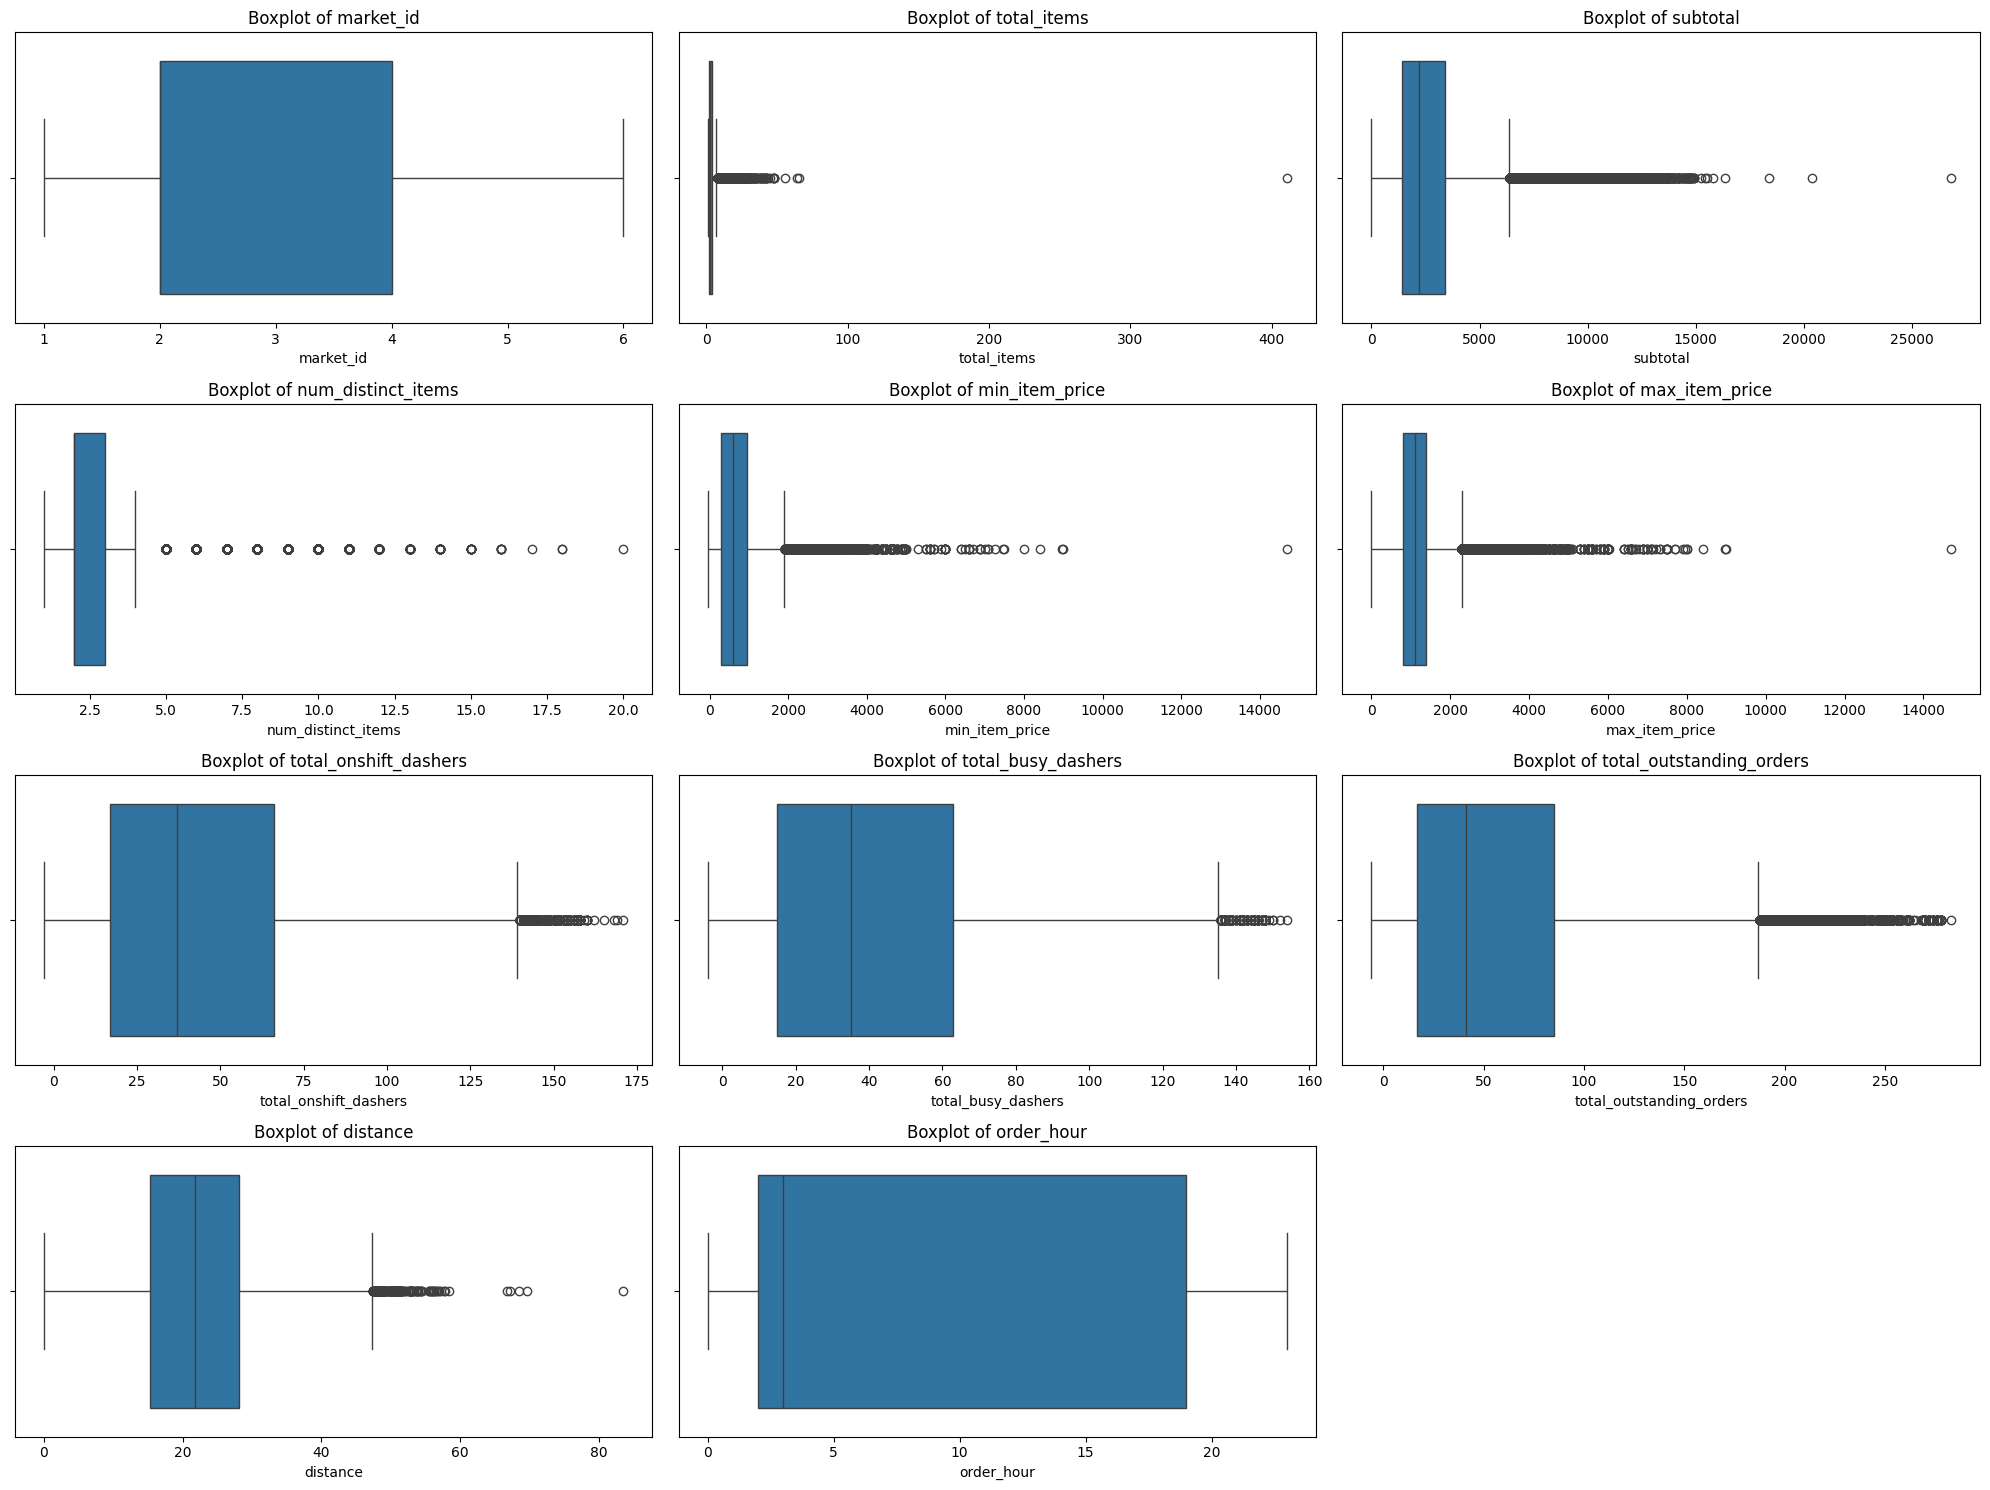

In [14]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Check for skewness in numerical features
# Make sure we're only calculating skewness for numeric columns
numeric_data = X_train[numerical_cols].select_dtypes(include=['number'])
skewness = pd.DataFrame(numeric_data.skew(), columns=['Skewness'])
print("Skewness of numerical features:")
print(skewness)

# Box plots to identify potential outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()




##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

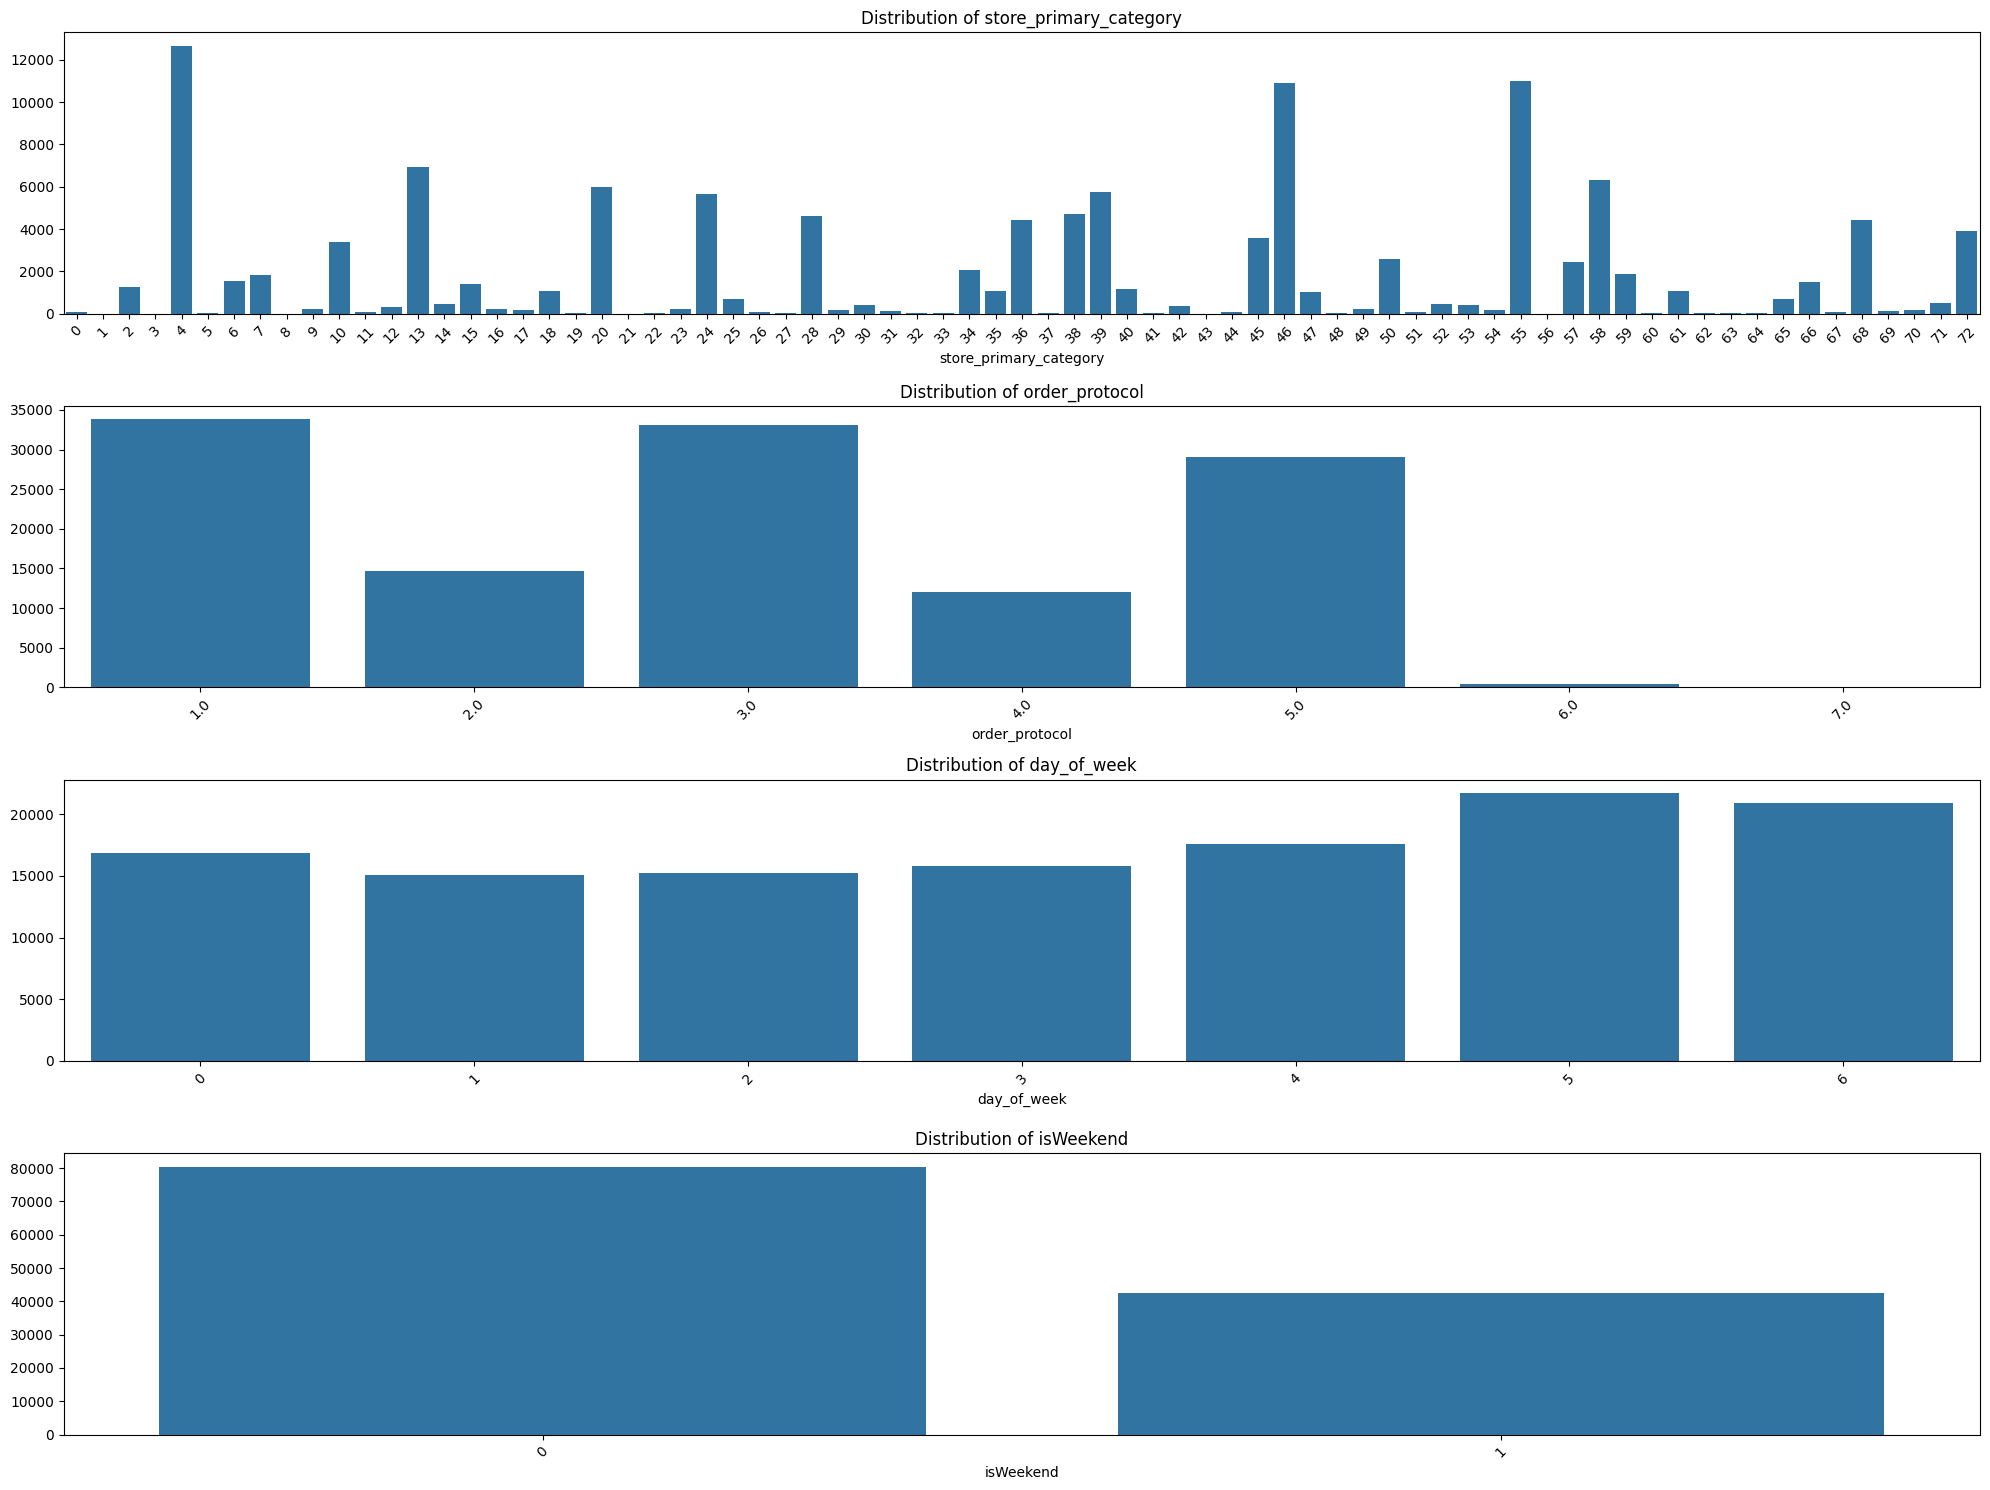

Percentage distribution of categorical features:

store_primary_category:
store_primary_category
0      0.063392
1      0.007315
2      1.009403
3      0.000813
4     10.289899
        ...    
68     3.602806
69     0.122721
70     0.132474
71     0.427493
72     3.172875
Name: proportion, Length: 73, dtype: float64

order_protocol:
order_protocol
1.0    27.487139
2.0    11.889339
3.0    26.874345
4.0     9.749437
5.0    23.617760
6.0     0.371415
7.0     0.010565
Name: proportion, dtype: float64

day_of_week:
day_of_week
0    13.674894
1    12.223369
2    12.387539
3    12.822347
4    14.295815
5    17.645051
6    16.950985
Name: proportion, dtype: float64

isWeekend:
isWeekend
0    65.403964
1    34.596036
Name: proportion, dtype: float64

Cardinality of categorical features:
store_primary_category: 73 unique values
order_protocol: 7 unique values
day_of_week: 7 unique values
isWeekend: 2 unique values


In [15]:
# Distribution of categorical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 1, i+1)
    value_counts = X_train[col].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

# Display percentage distribution for each categorical feature
print("Percentage distribution of categorical features:")
for col in categorical_cols:
    percentage_dist = X_train[col].value_counts(normalize=True).sort_index() * 100
    print(f"\n{col}:")
    print(percentage_dist)
    
# Check for cardinality (number of unique values) in categorical features
cardinality = {col: X_train[col].nunique() for col in categorical_cols}
print("\nCardinality of categorical features:")
for col, count in cardinality.items():
    print(f"{col}: {count} unique values")


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

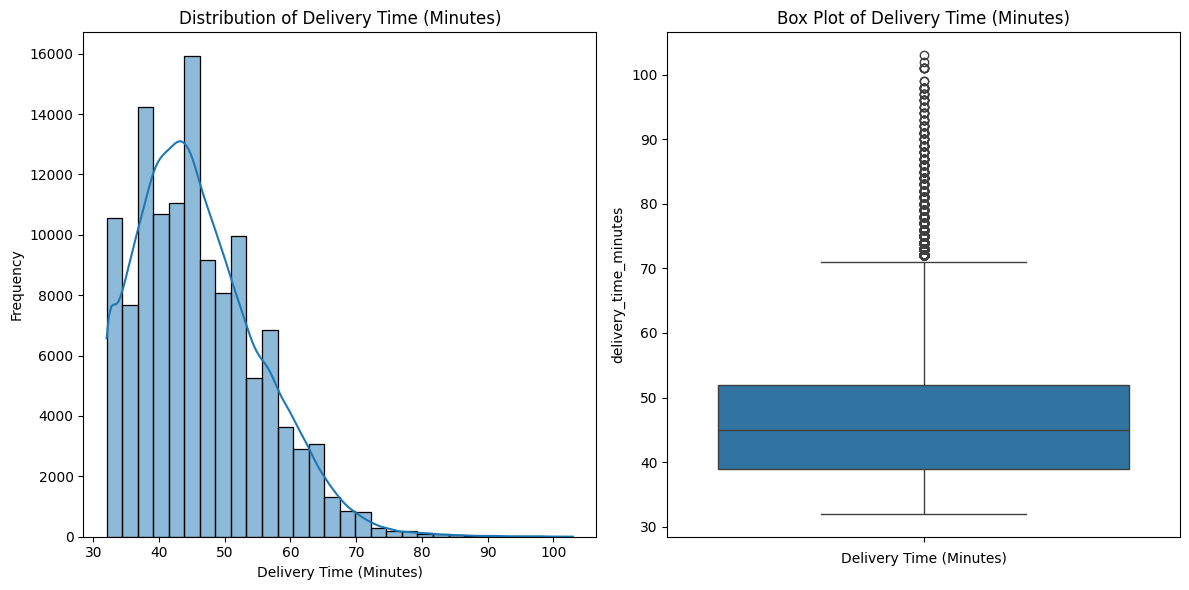

Descriptive Statistics for Delivery Time (Minutes):
count    123043.000000
mean         46.192656
std           9.332173
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         103.000000
Name: delivery_time_minutes, dtype: float64

Skewness: 0.7717
Kurtosis: 0.6531

Normality Test p-value: 0.0000
Is the distribution normal? No


In [16]:
# Distribution of time_taken
# Visualize the distribution of delivery_time_minutes (target variable)
plt.figure(figsize=(12, 6))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, bins=30)
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=y_train)
plt.title('Box Plot of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')

plt.tight_layout()
plt.show()

# Calculate descriptive statistics for the target variable
print("Descriptive Statistics for Delivery Time (Minutes):")
print(y_train.describe())

# Check for skewness and kurtosis
skewness = y_train.skew()
kurtosis = y_train.kurt()
print(f"\nSkewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Determine if the distribution is approximately normal
from scipy import stats
stat, p_value = stats.normaltest(y_train)
print(f"\nNormality Test p-value: {p_value:.4f}")
print(f"Is the distribution normal? {'Yes' if p_value > 0.05 else 'No'}")



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

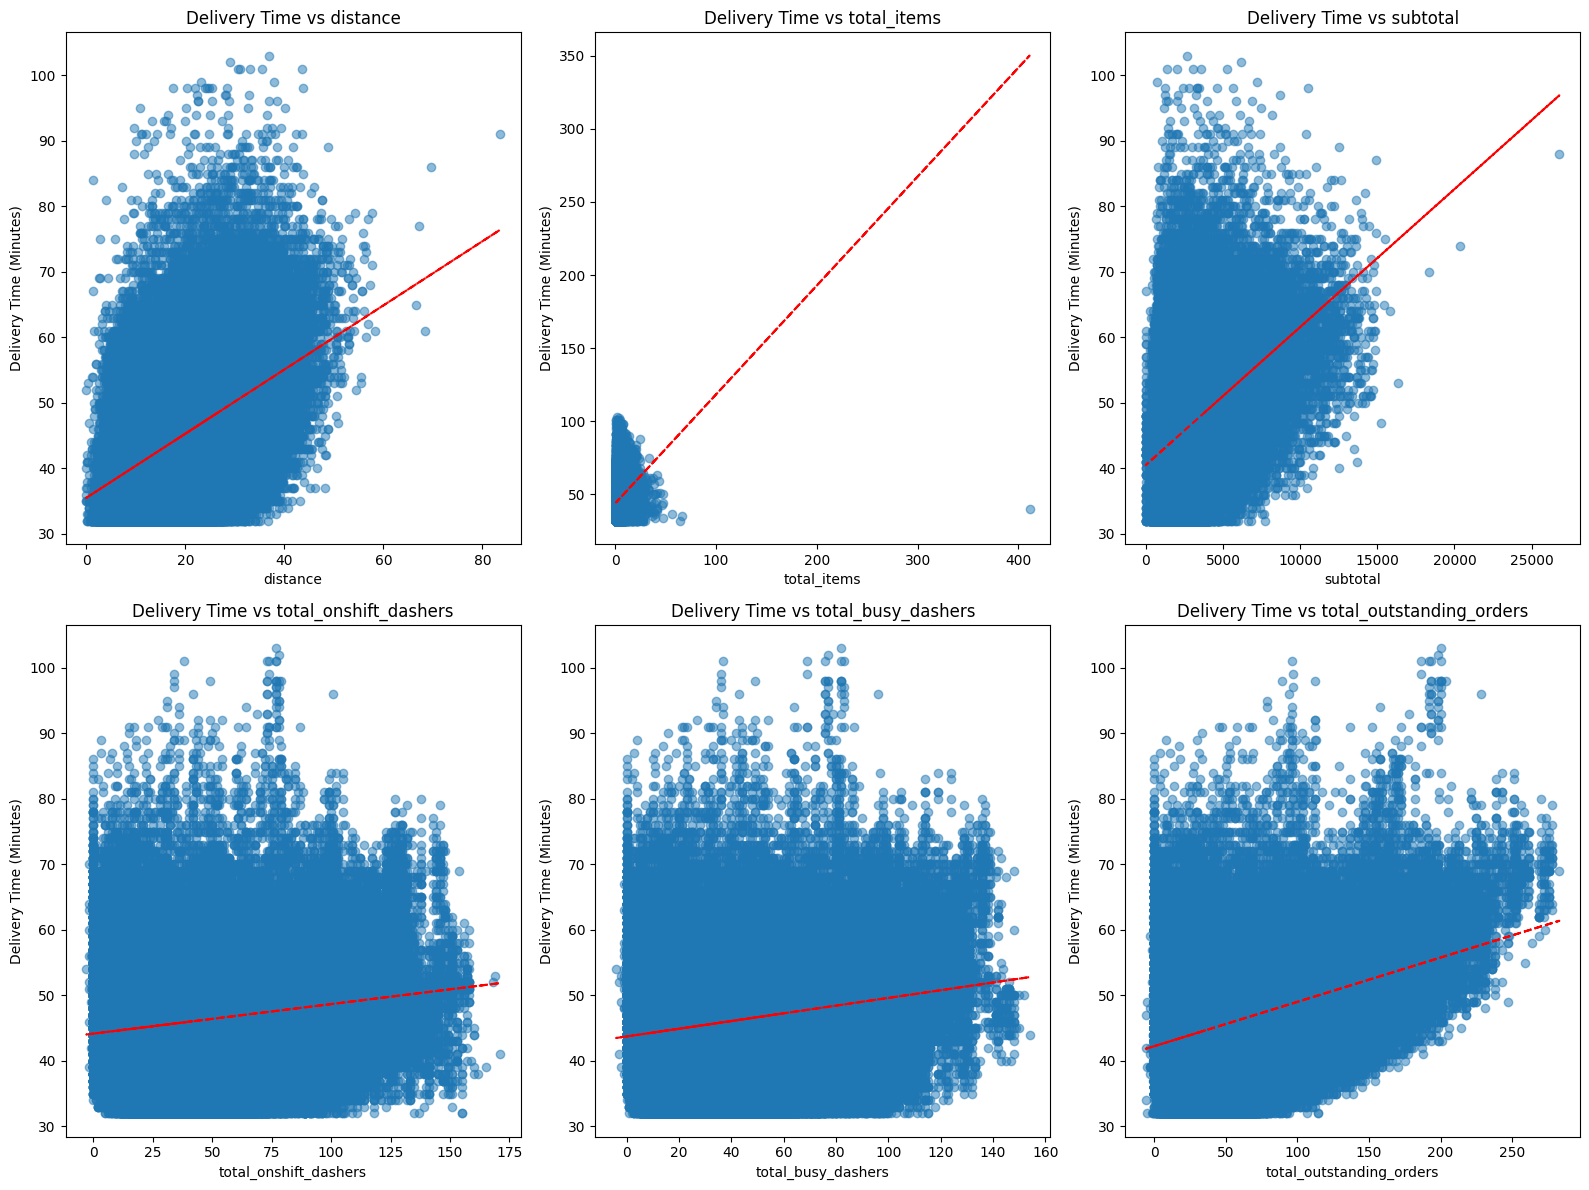

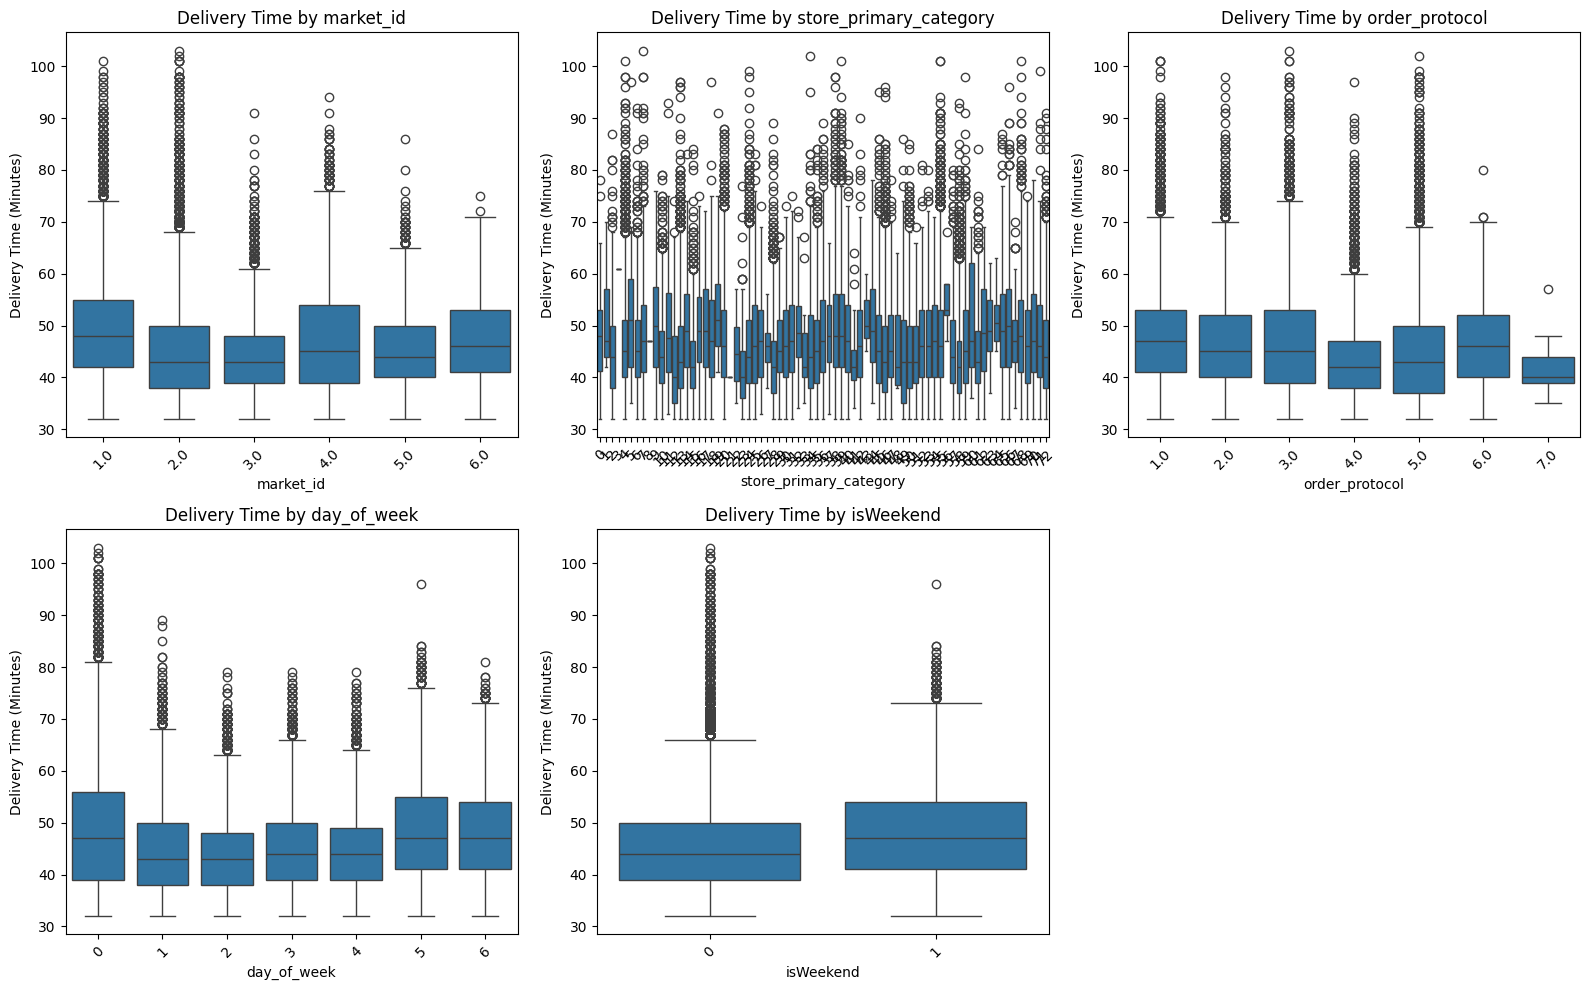

In [17]:
# Scatter plot to visualise the relationship between time_taken and other features
# Create a figure with multiple subplots for important numerical features
plt.figure(figsize=(16, 12))

# Numerical features that might impact delivery time
numerical_features = ['distance', 'total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']

# Create scatter plots for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train[feature], y_train, alpha=0.5)
    plt.title(f'Delivery Time vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (Minutes)')
    
    # Add regression line
    z = np.polyfit(X_train[feature], y_train, 1)
    p = np.poly1d(z)
    plt.plot(X_train[feature], p(X_train[feature]), "r--")

plt.tight_layout()
plt.show()

# Create a figure for categorical features
plt.figure(figsize=(16, 10))

# Categorical features
categorical_features = ['market_id', 'store_primary_category', 'order_protocol', 'day_of_week', 'isWeekend']

# Create box plots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=X_train[feature], y=y_train)
    plt.title(f'Delivery Time by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (Minutes)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



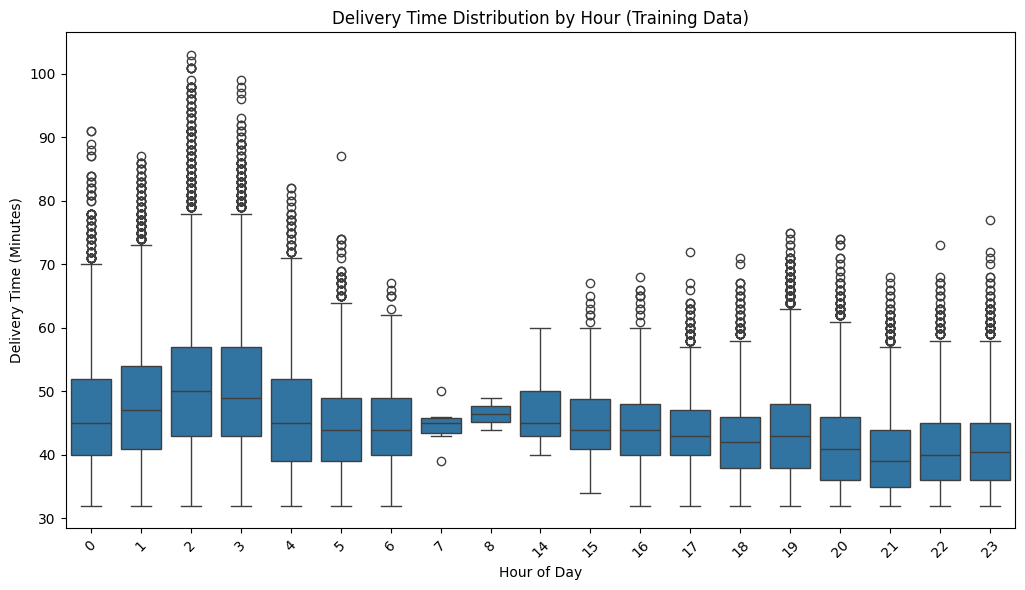

In [18]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(20, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='order_hour', y=y_train, data=X_train.assign(delivery_time_minutes=y_train))
plt.title('Delivery Time Distribution by Hour (Training Data)')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time (Minutes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()






#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

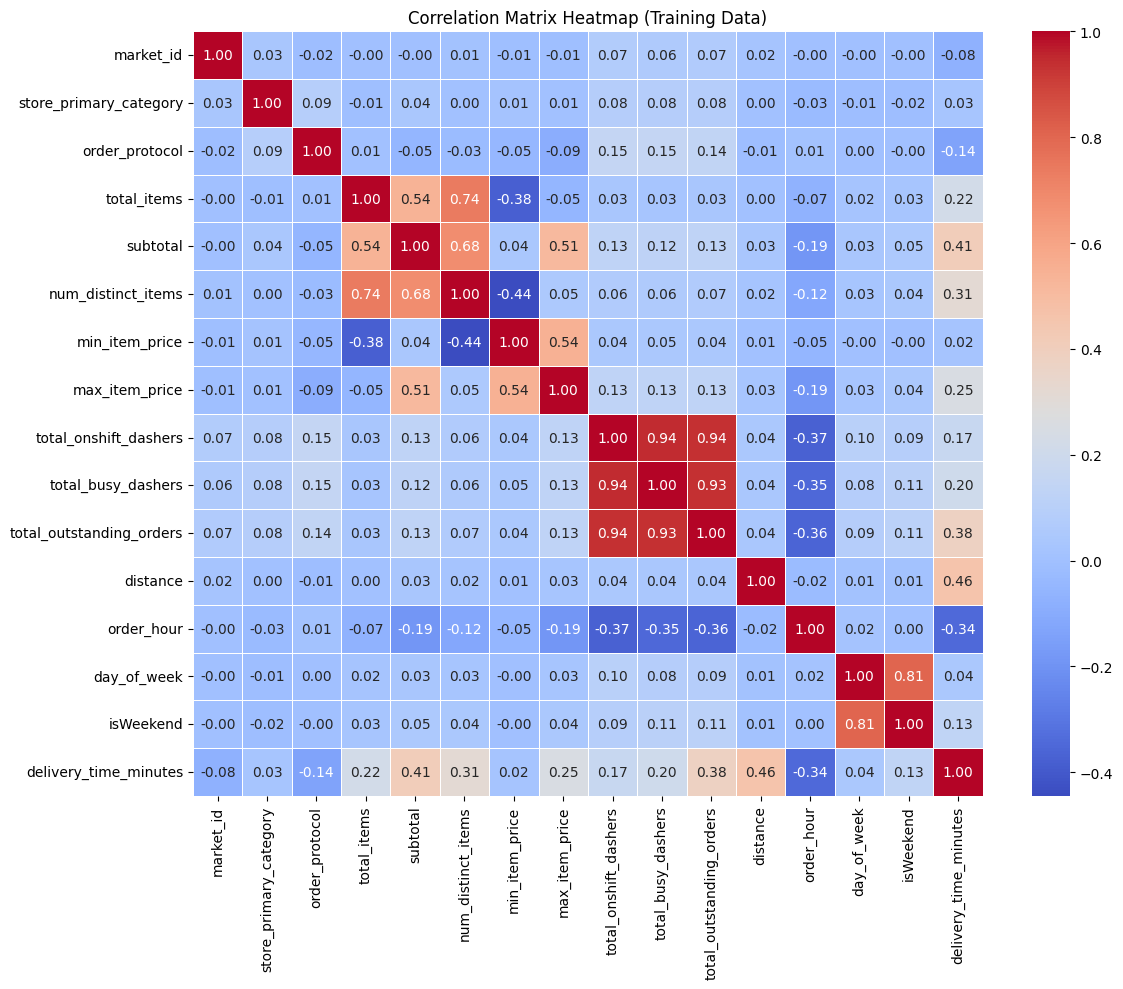

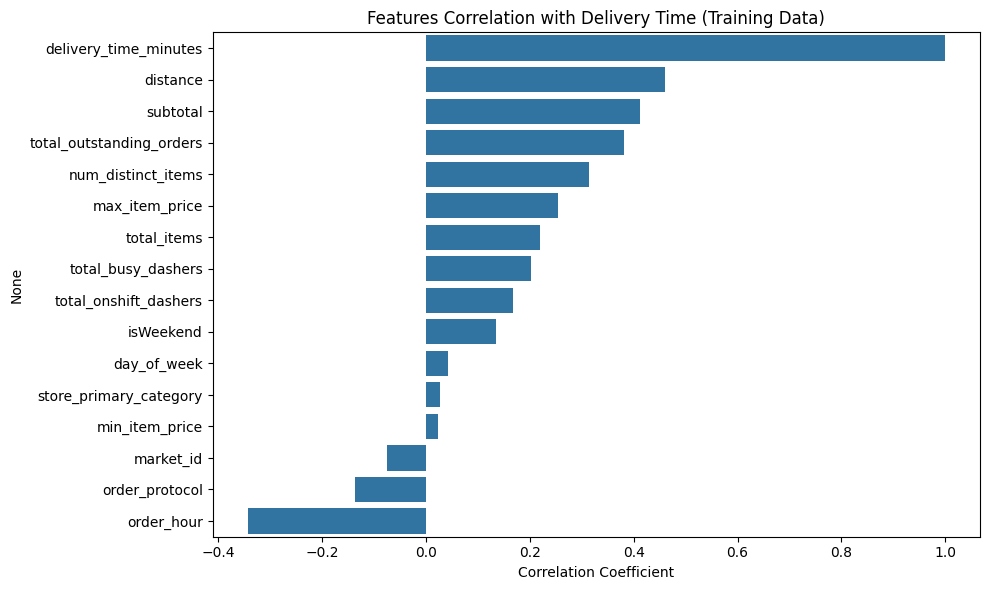

In [19]:
# Plot the heatmap of the correlation matrix
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Training Data)')
plt.tight_layout()
plt.show()

# Focus on correlations with the target variable
plt.figure(figsize=(10, 6))
corr_with_target = correlation_matrix['delivery_time_minutes'].sort_values(ascending=False)
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Features Correlation with Delivery Time (Training Data)')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()



##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [20]:
# Drop 3-5 weakly correlated columns from training dataset

# Sort and list correlation values for each column - 
target_correlations = correlation_matrix['delivery_time_minutes'].abs().sort_values()
print("Correlations with delivery_time_minutes (absolute values, ascending):")
print(target_correlations)

Correlations with delivery_time_minutes (absolute values, ascending):
min_item_price              0.022281
store_primary_category      0.027475
day_of_week                 0.042553
market_id                   0.075735
isWeekend                   0.133896
order_protocol              0.137906
total_onshift_dashers       0.166812
total_busy_dashers          0.202562
total_items                 0.219104
max_item_price              0.254671
num_distinct_items          0.313384
order_hour                  0.344002
total_outstanding_orders    0.381642
subtotal                    0.412878
distance                    0.459712
delivery_time_minutes       1.000000
Name: delivery_time_minutes, dtype: float64


In [21]:
# Drop columns with lowest correlation values
weak_columns = ['min_item_price', 'store_primary_category', 'day_of_week', 'market_id']

# Drop the weakly correlated columns
X_train = X_train.drop(columns=weak_columns)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

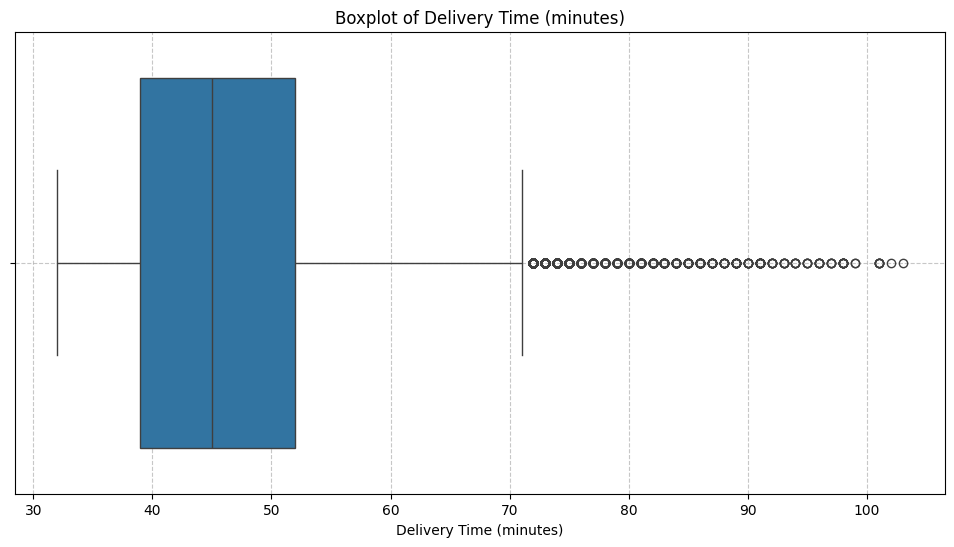

In [22]:
# Boxplot for time_taken
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train)
plt.title('Boxplot of Delivery Time (minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

Number of outliers removed from feature total_items: 5927
Number of outliers removed from feature subtotal: 3971
Number of outliers removed from feature num_distinct_items: 425
Number of outliers removed from feature max_item_price: 3646
Number of outliers removed from feature total_onshift_dashers: 906
Number of outliers removed from feature total_busy_dashers: 302
Number of outliers removed from feature total_outstanding_orders: 3429
Number of outliers removed from feature distance: 199
Number of outliers removed from feature order_hour: 0
Number of outliers removed from feature isWeekend: 0

Number of outliers removed from target variable: 998

Summary statistics before outlier handling:
Features (X):
         total_items       subtotal  num_distinct_items  max_item_price  \
count  123043.000000  123043.000000       123043.000000   123043.000000   
mean        3.206082    2697.863625            2.674951     1160.434645   
std         2.745043    1830.338637            1.625552      

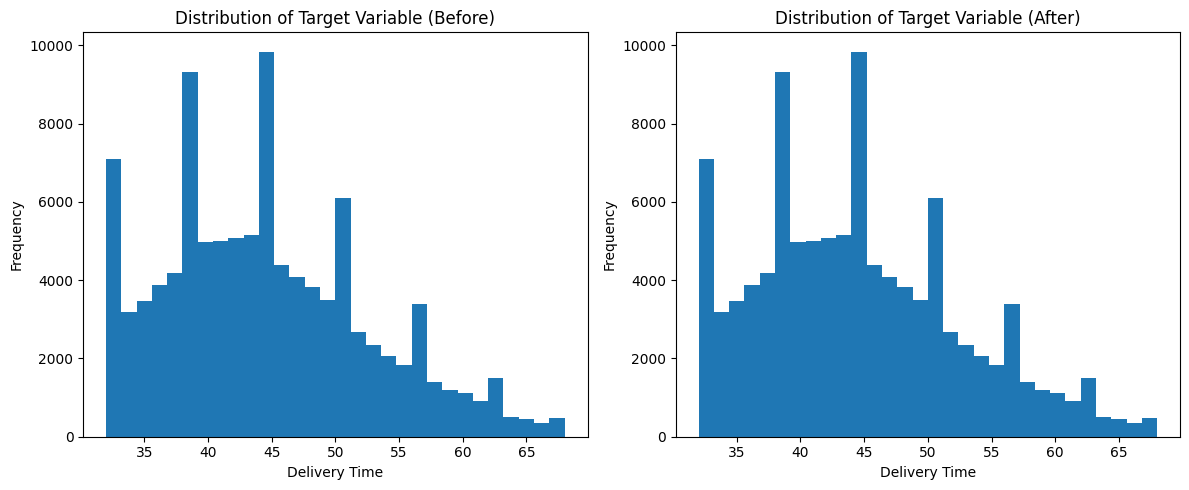

In [23]:
# Handle outliers
def handle_outliers(X, y, X_columns, y_column):
    """
    Handle outliers in both features (X) and target variable (y)
    Returns new X and y with outliers handled
    """
    X_clean = X.copy()
    y_clean = y.copy()
    
    # First handle outliers in features (X)
    for column in X_columns:
        # Calculate Q1, Q3 and IQR
        Q1 = X_clean[column].quantile(0.25)
        Q3 = X_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Get indices of outliers
        outlier_indices = X_clean[(X_clean[column] < lower_bound) | (X_clean[column] > upper_bound)].index
        
        # Remove outliers from both X and y
        X_clean = X_clean.drop(outlier_indices)
        y_clean = y_clean.drop(outlier_indices)
        
        # Print number of outliers handled
        print(f"Number of outliers removed from feature {column}: {len(outlier_indices)}")
    
    # Then handle outliers in target variable (y)
    Q1_y = y_clean.quantile(0.25)
    Q3_y = y_clean.quantile(0.75)
    IQR_y = Q3_y - Q1_y
    
    # Define bounds for y
    lower_bound_y = Q1_y - 1.5 * IQR_y
    upper_bound_y = Q3_y + 1.5 * IQR_y
    
    # Get indices of outliers in y
    outlier_indices_y = y_clean[(y_clean < lower_bound_y) | (y_clean > upper_bound_y)].index
    
    # Remove outliers from both X and y
    X_clean = X_clean.drop(outlier_indices_y)
    y_clean = y_clean.drop(outlier_indices_y)
    
    print(f"\nNumber of outliers removed from target variable: {len(outlier_indices_y)}")
    
    return X_clean, y_clean

# Get numerical columns for outlier handling
numerical_columns = X_train.select_dtypes(exclude=['category', 'object']).columns

# Handle outliers in both training data and target variable
X_train_clean, y_train_clean = handle_outliers(X_train, y_train, numerical_columns, 'time_taken')

# Display summary statistics before and after outlier handling
print("\nSummary statistics before outlier handling:")
print("Features (X):")
print(X_train[numerical_columns].describe())
print("\nTarget (y):")
print(y_train.describe())

print("\nSummary statistics after outlier handling:")
print("Features (X):")
print(X_train_clean[numerical_columns].describe())
print("\nTarget (y):")
print(y_train_clean.describe())

# Update X_train and y_train with cleaned data
X_train = X_train_clean
y_train = y_train_clean

# Print shapes to verify alignment
print("\nShapes after cleaning:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Visualize the distribution of target variable before and after outlier removal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30)
plt.title('Distribution of Target Variable (Before)')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_train_clean, bins=30)
plt.title('Distribution of Target Variable (After)')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [24]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Define numerical and categorical columns for test data
# Using the same columns as in training data for consistency

# Numerical columns for test data
test_numerical_columns = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 
                         'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 
                         'total_outstanding_orders', 'distance', 'order_hour']

# Categorical columns for test data
test_categorical_columns = ['market_id', 'store_primary_category', 'order_protocol', 
                           'day_of_week', 'isWeekend']

# Target variable remains the same
test_target_column = 'delivery_time_minutes'

# Print the defined columns for verification
print("Test data - Numerical columns:", len(test_numerical_columns))
print("Test data - Categorical columns:", len(test_categorical_columns))
print("Test data - Target column:", test_target_column)

# Verify that test data contains all required columns
missing_columns = [col for col in test_numerical_columns + test_categorical_columns 
                  if col not in X_test.columns]
if missing_columns:
    print(f"Warning: The following columns are missing in test data: {missing_columns}")
else:
    print("All required columns are present in test data.")


Test data - Numerical columns: 10
Test data - Categorical columns: 5
Test data - Target column: delivery_time_minutes
All required columns are present in test data.


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

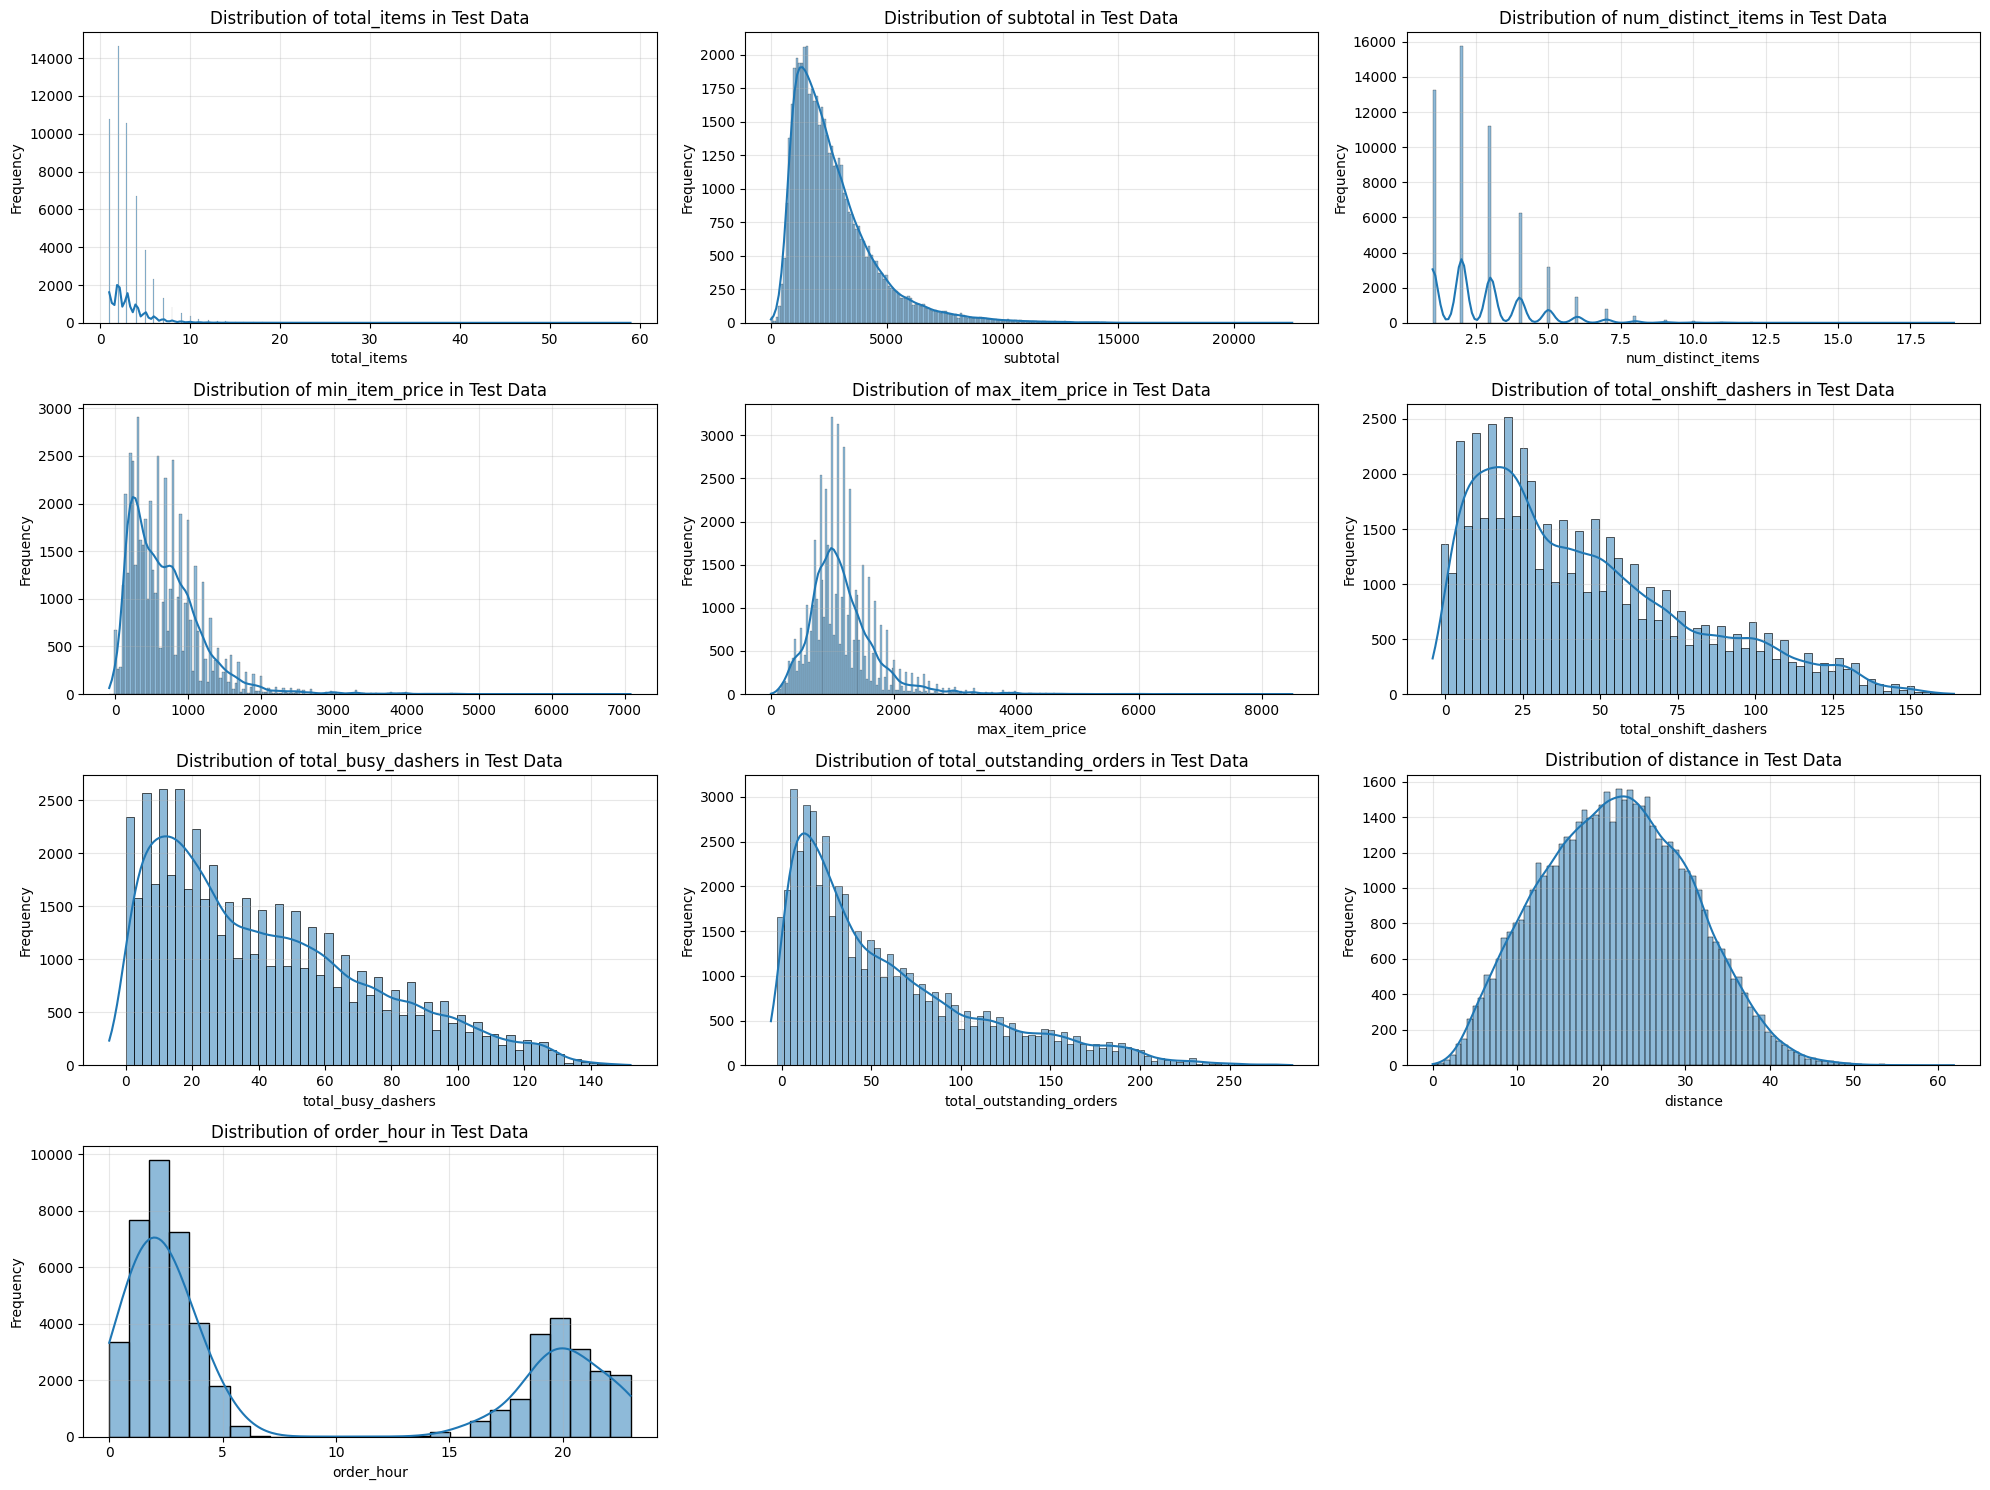

In [25]:
# Plot distributions for all numerical columns
# Set up the figure for plotting numerical distributions
plt.figure(figsize=(20, 15))

# Create subplots for each numerical column
for i, col in enumerate(test_numerical_columns):
    plt.subplot(4, 3, i+1)
    
    # Plot histogram with KDE
    sns.histplot(X_test[col], kde=True)
    
    # Add title and labels
    plt.title(f'Distribution of {col} in Test Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Create boxplots to identify outliers in numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(test_numerical_columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=X_test[col])
    plt.title(f'Boxplot of {col} in Test Data')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



##### **4.1.2**
Check the distribution of categorical features

In [26]:
# Distribution of categorical columns
# Identify categorical columns in the test data
test_categorical_columns = X_test.select_dtypes(include=['object', 'category']).columns.tolist()

# If there are any categorical columns that are actually numeric but stored as objects, add them
for col in X_test.columns:
    if col not in test_numerical_columns and col not in test_categorical_columns:
        if X_test[col].dtype == 'int64' or X_test[col].dtype == 'float64':
            continue
        else:
            test_categorical_columns.append(col)

# Check if there are any categorical columns to plot
if len(test_categorical_columns) > 0:
    # Set up the figure for plotting categorical distributions
    plt.figure(figsize=(10, 10))
    
    # Create subplots for each categorical column
    for i, col in enumerate(test_categorical_columns):
        plt.subplot(len(test_categorical_columns), 1, i+1)
        
        # Count plot for categorical variables
        sns.countplot(y=X_test[col], order=X_test[col].value_counts().index)
        
        # Add title and labels
        plt.title(f'Distribution of {col} in Test Data')
        plt.xlabel('Count')
        plt.ylabel(col)
        
        # Add grid for better readability
        plt.grid(True, alpha=0.3)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found in the test data.")



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

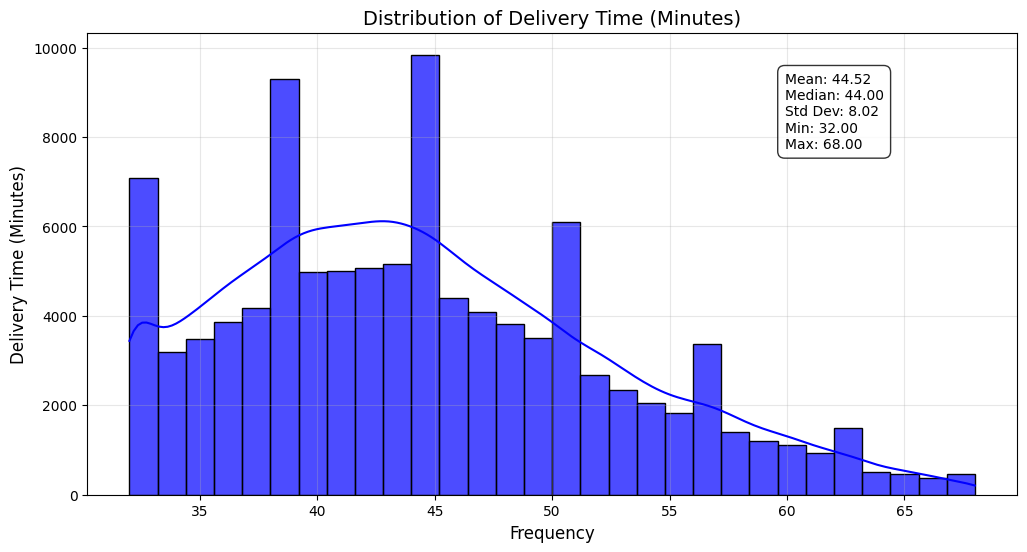

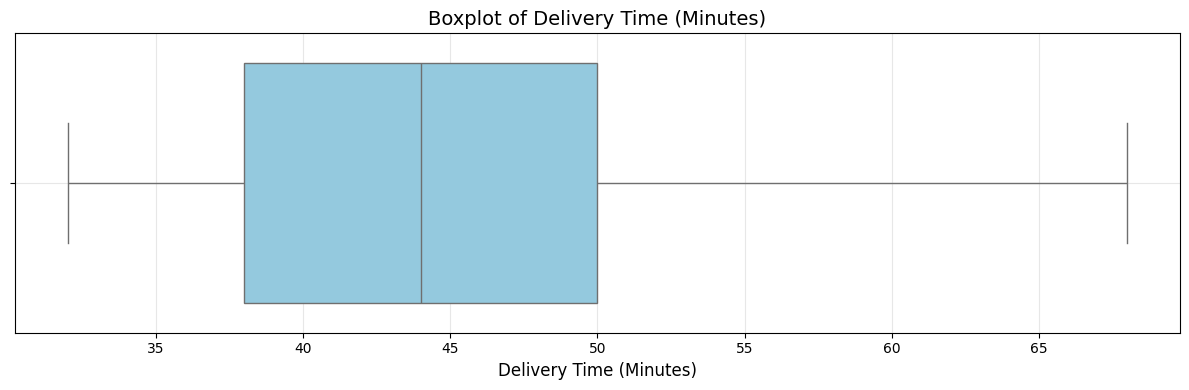

In [27]:
# Distribution of time_taken
# Visualize the distribution of the target variable (delivery_time_minutes)
plt.figure(figsize=(12, 6))

# Histogram with KDE
sns.histplot(y_train, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Delivery Time (Minutes)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Delivery Time (Minutes)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add descriptive statistics as text
stats_text = f"Mean: {y_train.mean():.2f}\nMedian: {y_train.median():.2f}\nStd Dev: {y_train.std():.2f}\nMin: {y_train.min():.2f}\nMax: {y_train.max():.2f}"
plt.annotate(stats_text, xy=(0.75, 0.75), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

# Add a boxplot to show outliers
plt.figure(figsize=(12, 4))
sns.boxplot(x=y_train, color='skyblue')
plt.title('Boxplot of Delivery Time (Minutes)', fontsize=14)
plt.xlabel('Delivery Time (Minutes)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

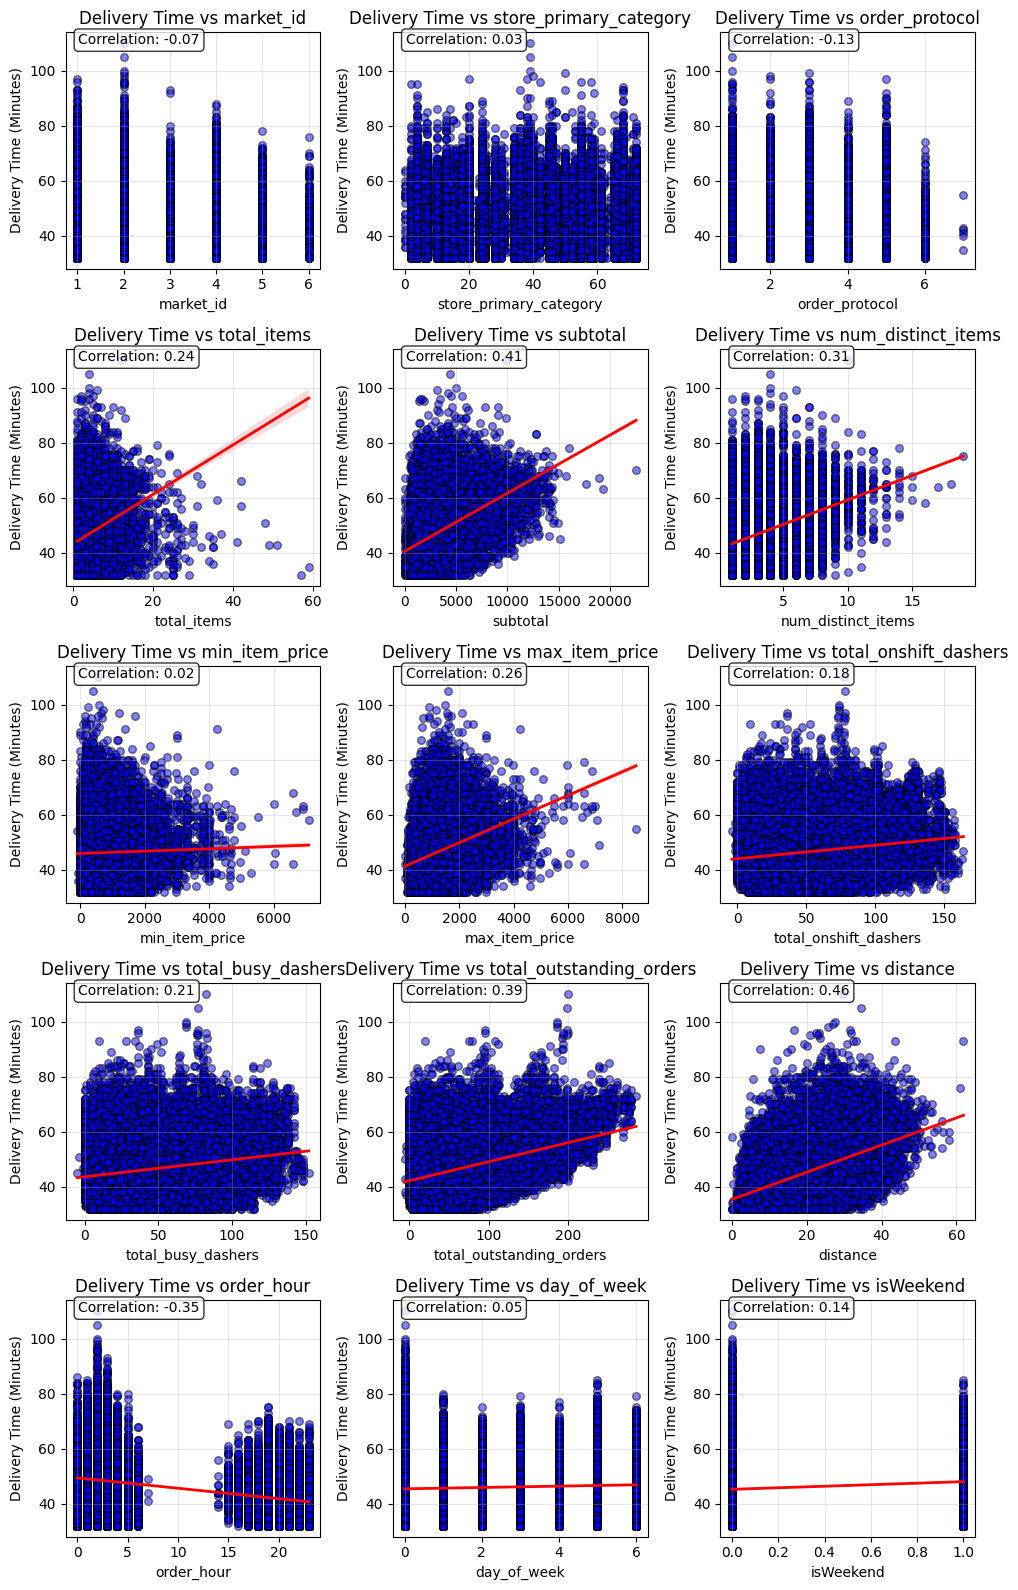

In [28]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(10, 16))

# Create a grid of scatter plots
for i, feature in enumerate(X_test.columns.tolist(), 1):
    plt.subplot(5, 3, i)
    plt.scatter(X_test[feature], y_test, alpha=0.5, color='blue', edgecolor='k', s=30)
    
    # Add regression line if numerical feature
    if X_test[feature].dtype not in ['category', 'object']:
        sns.regplot(x=X_test[feature], y=y_test, scatter=False, color='red', line_kws={'linewidth':2})
    
    plt.title(f'Delivery Time vs {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Delivery Time (Minutes)', fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Calculate and display correlation coefficient
    corr = X_test[feature].corr(y_test)
    plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



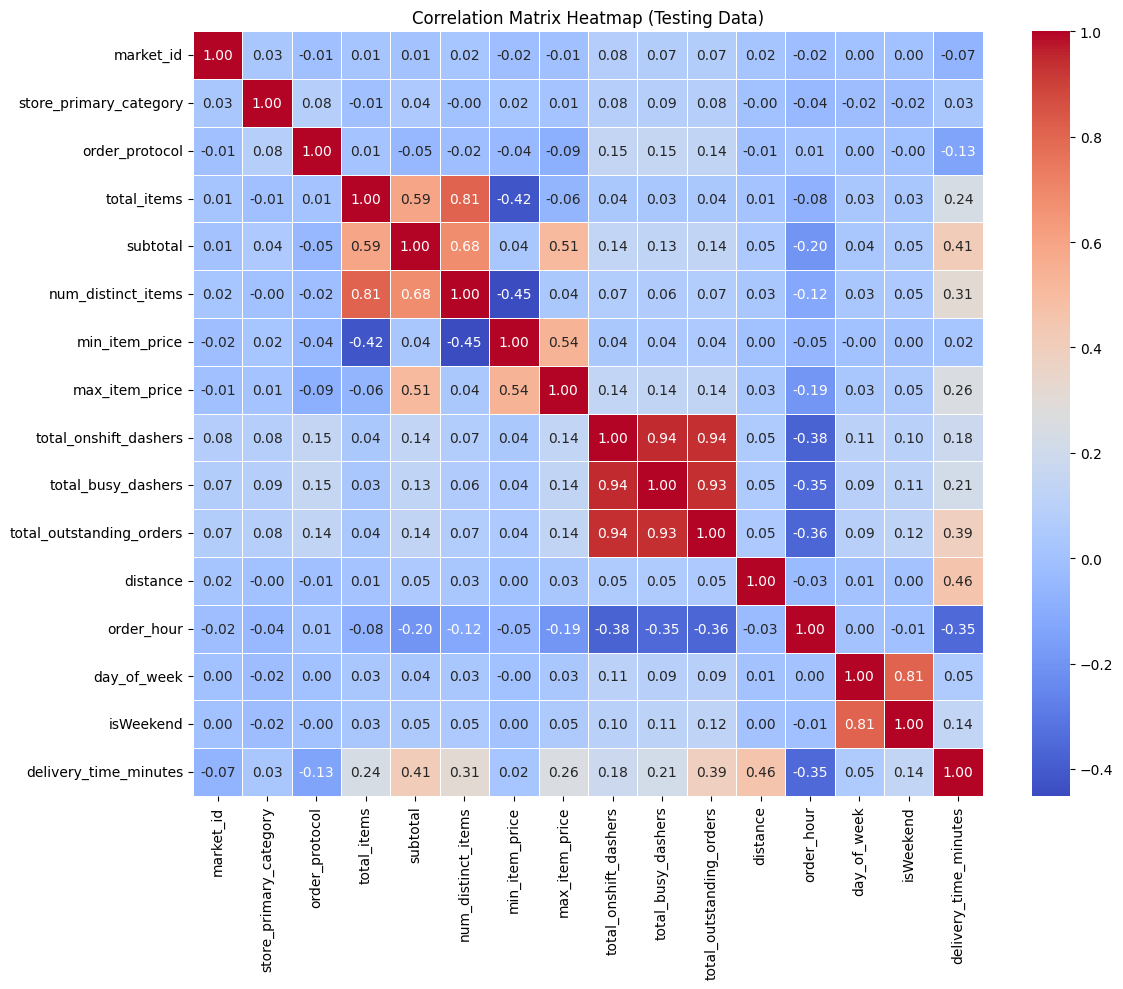

In [29]:
# Plot the heatmap of the correlation matrix
correlation_matrix = pd.concat([X_test, y_test], axis=1).corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Testing Data)')
plt.tight_layout()
plt.show()



#### **4.3** Drop the columns with weak correlations with the target variable

In [30]:
# Drop the weakly correlated columns from training dataset

# Sort and list correlation values for each column - 

correlation_matrix = pd.concat([X_test, y_test], axis=1).corr()
target_correlations = correlation_matrix['delivery_time_minutes'].abs().sort_values()
print("Correlations with delivery_time_minutes (absolute values, ascending):")
print(target_correlations)


Correlations with delivery_time_minutes (absolute values, ascending):
min_item_price              0.023859
store_primary_category      0.025820
day_of_week                 0.053633
market_id                   0.066707
order_protocol              0.134062
isWeekend                   0.142312
total_onshift_dashers       0.180881
total_busy_dashers          0.214176
total_items                 0.240299
max_item_price              0.256359
num_distinct_items          0.308949
order_hour                  0.351905
total_outstanding_orders    0.392837
subtotal                    0.414185
distance                    0.461253
delivery_time_minutes       1.000000
Name: delivery_time_minutes, dtype: float64


In [31]:
# Drop weakly correlated columns from test dataset
weak_columns = ['min_item_price', 'store_primary_category', 'day_of_week', 'market_id']
X_test = X_test.drop(columns=weak_columns)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52734 entries, 139667 to 3735
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_protocol            52734 non-null  category
 1   total_items               52734 non-null  int64   
 2   subtotal                  52734 non-null  int64   
 3   num_distinct_items        52734 non-null  int64   
 4   max_item_price            52734 non-null  int64   
 5   total_onshift_dashers     52734 non-null  float64 
 6   total_busy_dashers        52734 non-null  float64 
 7   total_outstanding_orders  52734 non-null  float64 
 8   distance                  52734 non-null  float64 
 9   order_hour                52734 non-null  int32   
 10  isWeekend                 52734 non-null  int64   
dtypes: category(1), float64(4), int32(1), int64(5)
memory usage: 4.3 MB


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [32]:
# Import libraries
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [33]:
# create list of numerical columns
numerical_columns = X_train.select_dtypes(exclude=['category', 'object']).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']


In [34]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()


# save the unscaled original data for later use
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

# scale the training data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Also scale the test data in advance
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])



In [35]:
X_train.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  103240.000000  103240.000000       103240.000000   103240.000000   
mean        0.286184       0.375228            0.278731        0.478908   
std         0.242950       0.198347            0.244328        0.176020   
min         0.000000       0.000000            0.000000        0.000000   
25%         0.166667       0.219054            0.000000        0.357494   
50%         0.166667       0.330806            0.200000        0.458613   
75%         0.500000       0.492830            0.400000        0.581655   
max         1.000000       1.000000            1.000000        1.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          103240.000000       103240.000000             103240.000000   
mean                0.313508            0.314548                  0.307403   
std                 0.219150            0.214442                  0.236160   
min                 0.000000            0.000000                  0.000000   
25%                 0.135714            0.134328                  0.118919   
50%                 0.264286            0.268657                  0.232432   
75%                 0.450000            0.462687                  0.443243   
max                 1.000000            1.000000                  1.000000   

            distance     order_hour      isWeekend  
count  103240.000000  103240.000000  103240.000000  
mean        0.458881       0.394184       0.327083  
std         0.183491       0.384134       0.469150  
min         0.000000       0.000000       0.000000  
25%         0.321459       0.086957       0.000000  
50%         0.458015       0.173913       0.000000  
75%         0.592027       0.826087       1.000000  
max         1.000000       1.000000       1.000000

In [36]:
X_test.describe()

total_items      subtotal  num_distinct_items  max_item_price  \
count  52734.000000  52734.000000        52734.000000    52734.000000   
mean       0.367066      0.444265            0.335063        0.518798   
std        0.416770      0.300709            0.325199        0.248698   
min        0.000000      0.000000            0.000000        0.000000   
25%        0.166667      0.230757            0.000000        0.357494   
50%        0.333333      0.366738            0.200000        0.489933   
75%        0.500000      0.562881            0.400000        0.624161   
max        9.666667      3.708587            3.600000        3.803132   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count           52734.000000        52734.000000              52734.000000   
mean                0.341234            0.341939                  0.346603   
std                 0.246345            0.240393                  0.285555   
min                -0.007143           -0.007463                  0.000000   
25%                 0.142857            0.141791                  0.124324   
50%                 0.285714            0.291045                  0.254054   
75%                 0.485714            0.492537                  0.491892   
max                 1.192857            1.164179                  1.572973   

           distance    order_hour     isWeekend  
count  52734.000000  52734.000000  52734.000000  
mean       0.463810      0.369038      0.344806  
std        0.184701      0.377087      0.475309  
min        0.000000      0.000000      0.000000  
25%        0.326548      0.086957      0.000000  
50%        0.463104      0.130435      0.000000  
75%        0.597116      0.826087      1.000000  
max        1.312129      1.000000      1.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [37]:
X_train.head()

order_protocol  total_items  subtotal  num_distinct_items  \
94746             5.0     0.166667  0.295039                 0.2   
173338            5.0     0.000000  0.139278                 0.0   
37592             5.0     0.000000  0.313170                 0.0   
42763             4.0     0.833333  0.076314                 0.4   
27506             1.0     0.333333  0.576891                 0.4   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
94746         0.445190               0.092857            0.097015   
173338        0.355705               0.978571            0.597015   
37592         0.536913               0.171429            0.186567   
42763         0.133781               0.721429            0.679104   
27506         0.536913               0.071429            0.126866   

        total_outstanding_orders  distance  order_hour  isWeekend  
94746                   0.113514  0.382528    0.782609        0.0  
173338                  0.767568  0.514843    0.086957        1.0  
37592                   0.183784  0.598813    1.000000        1.0  
42763                   0.729730  0.294317    0.043478        1.0  
27506                   0.124324  0.169635    0.217391        1.0

In [38]:
# Sort and list correlation values and VIF for each column. Also list out Feature pairs with higher VIF than 3
def print_correlation(df_x, df_y):
    correlation_matrix = pd.concat([df_x, df_y], axis=1).corr()    
    target_correlations = correlation_matrix['delivery_time_minutes'].abs().sort_values()
    print("Correlations with delivery_time_minutes (absolute values, ascending):")
    print(target_correlations)

def print_vif(df):
    '''Function to calculate VIF for all features in a dataframe'''
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print("\nVIF values for features :")
    print(vif)


def calculate_pairwise_vif(X):
    """
    Calculate and print pairwise VIF values between features
    """
    # Get list of features
    features = X.columns
    
    # Create empty DataFrame to store results
    vif_matrix = pd.DataFrame(index=features, columns=features)
    
    # Calculate VIF for each pair of features
    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            if i != j:  # Skip same feature comparison
                # Create temporary DataFrame with just these two features
                temp_X = X[[feature1, feature2]]
                # Add constant
                temp_X = sm.add_constant(temp_X)
                # Calculate VIF for feature1
                vif = variance_inflation_factor(temp_X.values, 1)  # 1 is the index of feature1
                vif_matrix.loc[feature1, feature2] = vif
            else:
                vif_matrix.loc[feature1, feature2] = 1.0  # VIF of a feature with itself is 1
    
    # Round the values to 2 decimal places
    vif_matrix = vif_matrix.round(2)
    
    # # Print the matrix
    # print("Pairwise VIF Matrix:")
    # print("===================")
    # print(vif_matrix)
    
    return vif_matrix

def print_high_vif_pairs(df_x, threshold=5):
    """
    Find and display feature pairs with VIF values above the threshold
    """
    vif_matrix = calculate_pairwise_vif(df_x)
    # Create a list to store high VIF pairs
    high_vif_pairs = []
    
    # Iterate through the matrix (only upper triangle to avoid duplicates)
    for i in range(len(vif_matrix.columns)):
        for j in range(i+1, len(vif_matrix.columns)):
            feature1 = vif_matrix.columns[i]
            feature2 = vif_matrix.columns[j]
            vif_value = vif_matrix.iloc[i, j]
            
            if vif_value > threshold:
                high_vif_pairs.append({
                    'Feature1': feature1,
                    'Feature2': feature2,
                    'VIF': vif_value
                })
    
    # Convert to DataFrame and sort by VIF in descending order
    if high_vif_pairs:
        high_vif_df = pd.DataFrame(high_vif_pairs)
        high_vif_df = high_vif_df.sort_values('VIF', ascending=False)
        
        print(f"\nFeature pairs with VIF > {threshold}:")
        print("=================================")
        for _, row in high_vif_df.iterrows():
            print(f"{row['Feature1']} vs {row['Feature2']}: {row['VIF']:.2f}")
    else:
        print(f"\nNo feature pairs found with VIF > {threshold}")

print_correlation(X_train, y_train)
print_vif(X_train)
print_high_vif_pairs(X_train, threshold=3)

Correlations with delivery_time_minutes (absolute values, ascending):
total_onshift_dashers       0.055915
total_busy_dashers          0.092451
isWeekend                   0.120300
order_protocol              0.166724
max_item_price              0.214259
total_items                 0.226229
num_distinct_items          0.248768
total_outstanding_orders    0.275815
order_hour                  0.321866
subtotal                    0.339614
distance                    0.499038
delivery_time_minutes       1.000000
Name: delivery_time_minutes, dtype: float64

VIF values for features :
                    Features    VIF
5      total_onshift_dashers  33.67
6         total_busy_dashers  31.50
7   total_outstanding_orders  25.74
2                   subtotal  17.22
4             max_item_price  14.16
1                total_items  13.83
3         num_distinct_items  10.99
8                   distance   5.69
0             order_protocol   4.17
9                 order_hour   2.10
10                 

In [39]:
# Observations:
# - None of the columns have high p-values.
# - VIF values are high for most of the columns.
# - No single feature has high correlation with target variable.

# new_X_train = X_train.drop(columns=['market_id'])
# print_correlation(new_X_train, y_train)
# print_vif(new_X_train)
# print_high_vif_pairs(new_X_train, threshold=3)

# X_train_sm = sm.add_constant(new_X_train)
# lr_model = sm.OLS(y_train, X_train_sm).fit()
# lr_model.summary()

In [40]:
# Create/Initialise the model

X_train_sm = sm.add_constant(X_train)

In [41]:
# Train the model using the training data
lr_model = sm.OLS(y_train, X_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.862
Model:                               OLS   Adj. R-squared:                  0.862
Method:                    Least Squares   F-statistic:                 5.861e+04
Date:                   Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                           23:46:14   Log-Likelihood:            -2.5918e+05
No. Observations:                 103240   AIC:                         5.184e+05
Df Residuals:                     103228   BIC:                         5.185e+05
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       35.6676      0.048    747.885      0.000      35.574      35.761
order_protocol              -0.6499      0.006   -104.317      0.000      -0.662      -0.638
total_items                 -0.4457      0.095     -4.707      0.000      -0.631      -0.260
subtotal                     7.9472      0.092     86.447      0.000       7.767       8.127
num_distinct_items           2.6081      0.083     31.412      0.000       2.445       2.771
max_item_price               1.2090      0.081     15.001      0.000       1.051       1.367
total_onshift_dashers      -51.9199      0.141   -368.470      0.000     -52.196     -51.644
total_busy_dashers         -18.3333      0.137   -134.015      0.000     -18.601     -18.065
total_outstanding_orders    65.4771      0.121    539.419      0.000      65.239      65.715
distance                    22.0487      0.051    435.640      0.000      21.950      22.148
order_hour                  -5.3552      0.026   -202.489      0.000      -5.407      -5.303
isWeekend                    1.5133      0.020     76.103      0.000       1.474       1.552
==============================================================================
Omnibus:                    25858.809   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67143.516
Skew:                           1.361   Prob(JB):                         0.00
Kurtosis:                       5.864   Cond. No.                         66.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Make predictions
y_train_pred = lr_model.predict(X_train_sm)


In [43]:
# Find results for evaluation metrics
X_test_sm = sm.add_constant(X_test)
y_test_pred_1 = lr_model.predict(X_test_sm)
r2_score(y_true=y_test, y_pred=y_test_pred_1)


0.8728482947398359

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

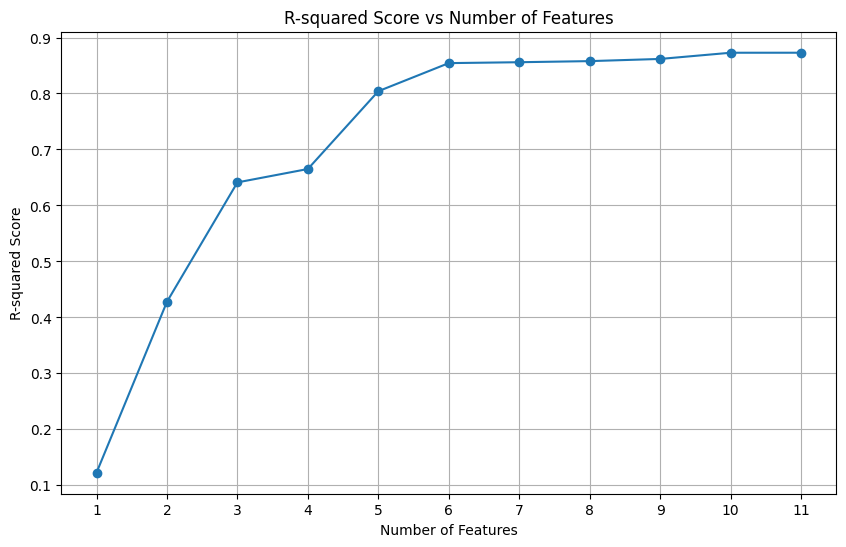

Optimal number of features: 11
R-squared score with 11 features: 0.8728


In [44]:
# Loop through the number of features and test the model


# for storing the R-squared scores for different numbers of features
feature_scores = {}

# Loop through different numbers of features
for n_features in range(1, len(X_train.columns) + 1):
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    # created model with selected features
    selected_features = X_train.columns[rfe.support_]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    lm.fit(X_train_selected, y_train)
    
    # Make predictions
    y_train_pred = lm.predict(X_train_selected)
    y_test_pred = lm.predict(X_test_selected)
    r2 = r2_score(y_test, y_test_pred)
    feature_scores[n_features] = r2

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list(feature_scores.keys()), list(feature_scores.values()), marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R-squared Score')
plt.title('R-squared Score vs Number of Features')
plt.grid(True)
plt.xticks(list(feature_scores.keys()))
plt.show()

# Find the optimal number of features
optimal_n_features = max(feature_scores, key=feature_scores.get)
print(f"Optimal number of features: {optimal_n_features}")
print(f"R-squared score with {optimal_n_features} features: {feature_scores[optimal_n_features]:.4f}")


In [45]:
# Build the final model with selected number of features

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=11)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# fit the model with selected features
lm.fit(X_train[selected_features], y_train)

# Calculate residuals for the next cell
# lm.fit(X_train[selected_features], y_train)
# y_train_pred = lm.predict(X_train[selected_features])
# res = y_train - y_train_pred


Selected features:
1. order_protocol
2. total_items
3. subtotal
4. num_distinct_items
5. max_item_price
6. total_onshift_dashers
7. total_busy_dashers
8. total_outstanding_orders
9. distance
10. order_hour
11. isWeekend


LinearRegression()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

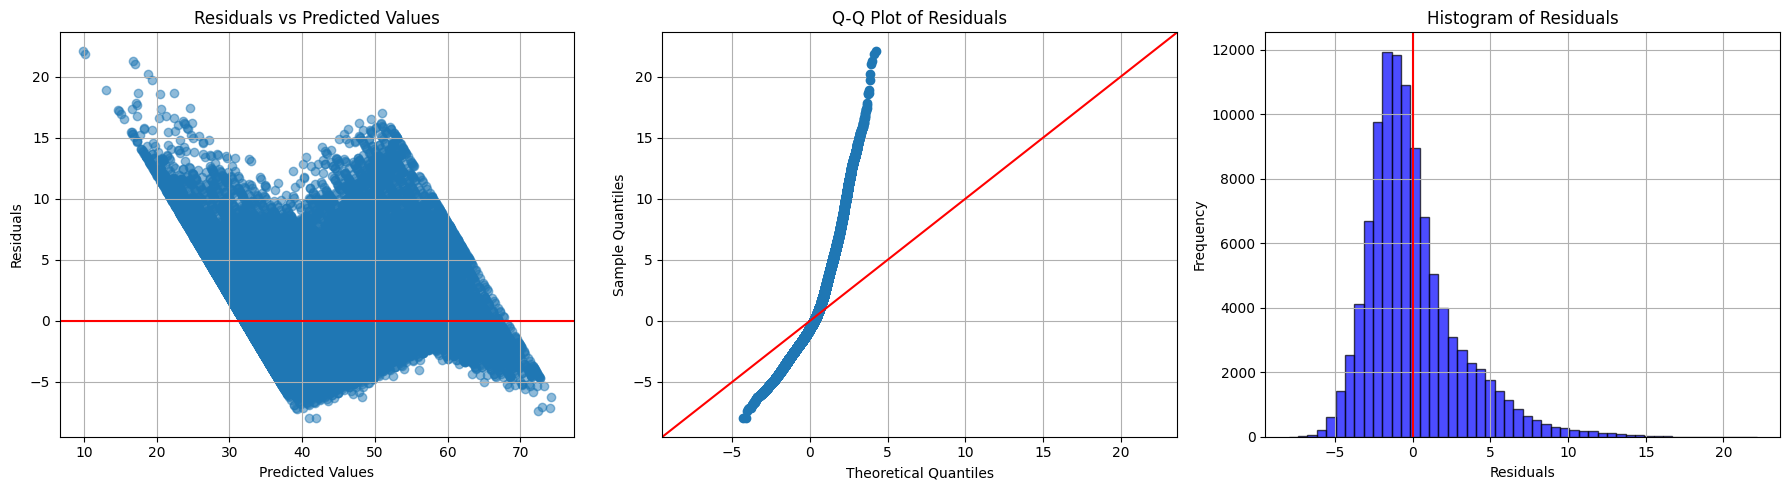

Residual Statistics:
Mean of residuals: 0.0000
Standard deviation of residuals: 2.9787
Skewness of residuals: 1.3607
Kurtosis of residuals: 2.8640


In [46]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Make predictions
y_train_pred = lm.predict(X_train[selected_features])

# Calculate residuals
residuals = y_train - y_train_pred

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuals vs Predicted Values
axes[0].scatter(y_train_pred, residuals, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='-')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')
axes[0].grid(True)

# 2. Q-Q Plot (Normal Probability Plot)
sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')
axes[1].grid(True)

# 3. Histogram of Residuals
axes[2].hist(residuals, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[2].axvline(x=0, color='r', linestyle='-')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Residuals')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Calculate some statistics about residuals
print("Residual Statistics:")
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals):.4f}")
print(f"Skewness of residuals: {stats.skew(residuals):.4f}")
print(f"Kurtosis of residuals: {stats.kurtosis(residuals):.4f}")



[Your inferences here:]
#### **Residual Analysis Inferences** :

Based on the residual plots and statistics, Following observations can be made :

##### 1. Residuals vs Predicted Values:
- The scatter plot shows residuals distributed fairly randomly around the zero line, which is a good indication of a linear relationship.
- There's no clear pattern or funnel shape, suggesting the assumption of homoscedasticity (constant variance) is mostly met.

##### 2. Q-Q Plot:
- The middle portion of the Q-Q plot follows the reference line closely, indicating normality in the central part of the distribution.
- Deviations at the tails suggest the residuals have heavier tails than a normal distribution.
- This indicates the presence of some outliers that the model doesn't capture well.

##### 3. Histogram of Residuals:
- The distribution is approximately bell-shaped but shows some right skewness.
- The peak is centered near zero, which is expected for a well-fitted model.
- The right skew suggests the model tends to underestimate delivery times in some cases.

##### Overall Assessment:
- The residual analysis suggests the linear regression assumptions are reasonably met.
- The model appears to be a good fit for the data, though there are possibly some outliers and slight skewness.
- The high R-squared value (0.86) is supported by the residual analysis, confirming the model explains most of the variance in delivery times.



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [47]:
# Compare the scaled vs unscaled features used in the final model
# Get the coefficients from the scaled model
scaled_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Scaled Coefficient': lm.coef_
}).sort_values(by='Scaled Coefficient', ascending=False)

# Create a MinMaxScaler with the same parameters used for training
scaler = MinMaxScaler()
scaler.fit(X_train)

# Calculate unscaled coefficients
# For MinMaxScaler, we need to divide by (max-min)
unscaled_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Unscaled Coefficient': lm.coef_ / (scaler.data_max_ - scaler.data_min_)
})

# Merge the two dataframes
coefficient_comparison = pd.merge(scaled_coefficients, unscaled_coefficients, on='Feature')

# Add the intercept (using concat instead of append which is deprecated)
intercept_df = pd.DataFrame({
    'Feature': ['Intercept'],
    'Scaled Coefficient': [lm.intercept_],
    'Unscaled Coefficient': [lm.intercept_]
})
coefficient_comparison = pd.concat([coefficient_comparison, intercept_df], ignore_index=True)

# Display the comparison
print("Comparison of Scaled vs Unscaled Coefficients (using MinMaxScaler):")
print(coefficient_comparison)

# Visualize the coefficients (excluding intercept)
plt.figure(figsize=(12, 8))
coef_df = coefficient_comparison[coefficient_comparison['Feature'] != 'Intercept'].copy()
coef_df = coef_df.sort_values('Scaled Coefficient', ascending=False)

plt.subplot(1, 2, 1)
plt.barh(coef_df['Feature'], coef_df['Scaled Coefficient'])
plt.title('Scaled Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.barh(coef_df['Feature'], coef_df['Unscaled Coefficient'])
plt.title('Unscaled Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()

plt.show()

# Interpretation
print("\nInterpretation:")
print("1. Scaled coefficients show the relative importance of features in the model.")
print("2. Unscaled coefficients represent the effect on delivery time in minutes for a one-unit change in the original feature.")
print("3. Features with larger absolute coefficients have a stronger impact on delivery time.")
print("4. MinMaxScaler was used to scale features between 0 and 1, which helps interpret the relative importance more intuitively.")






Comparison of Scaled vs Unscaled Coefficients (using MinMaxScaler):
                     Feature  Scaled Coefficient  Unscaled Coefficient
0   total_outstanding_orders           65.477074             65.477074
1                   distance           22.048723             22.048723
2                   subtotal            7.947225              7.947225
3         num_distinct_items            2.608067              2.608067
4                  isWeekend            1.513274              1.513274
5             max_item_price            1.208952              1.208952
6                total_items           -0.445744             -0.445744
7             order_protocol           -0.649854             -0.108309
8                 order_hour           -5.355221             -5.355221
9         total_busy_dashers          -18.333300            -18.333300
10     total_onshift_dashers          -51.919890            -51.919890
11                 Intercept           35.667615             35.667615



Interpretation:
1. Scaled coefficients show the relative importance of features in the model.
2. Unscaled coefficients represent the effect on delivery time in minutes for a one-unit change in the original feature.
3. Features with larger absolute coefficients have a stronger impact on delivery time.
4. MinMaxScaler was used to scale features between 0 and 1, which helps interpret the relative importance more intuitively.


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

Categorical features: ['order_protocol']
Numerical features: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']

Effect of a Unit Change in Each Feature on Delivery Time:
                     Feature  Unit Change Value  \
7   total_outstanding_orders                1.0   
5      total_onshift_dashers                1.0   
8                   distance                1.0   
6         total_busy_dashers                1.0   
2                   subtotal                1.0   
9                 order_hour                1.0   
3         num_distinct_items                1.0   
10                 isWeekend                1.0   
4             max_item_price                1.0   
1                total_items                1.0   
0             order_protocol                1.0   

    Effect on Delivery Time (minutes)  
7                           65.477074  
5    

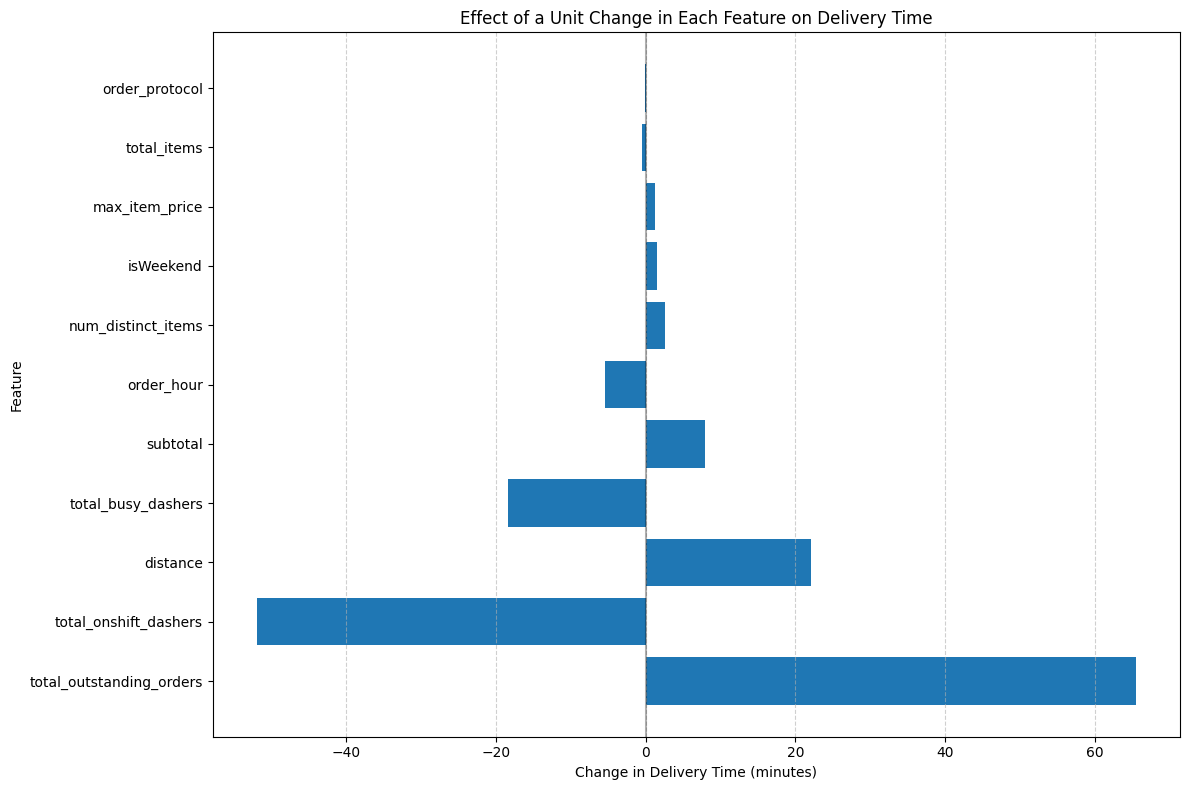

In [48]:
# Analyze the effect of a unit change in a feature, say 'total_items'

categorical_features = []
numerical_features = []

for feature in X_train.columns:
    if pd.api.types.is_categorical_dtype(X_train[feature]):
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

# Create a DataFrame to show the effect of a unit change in each feature
unit_change_effects = pd.DataFrame(columns=['Feature', 'Unit Change Value', 'Effect on Delivery Time (minutes)'])

# For each feature, calculate the effect of a unit change
for feature in X_train.columns:
    # Get the coefficient from the model
    unscaled_coef = coefficient_comparison[coefficient_comparison['Feature'] == feature]['Unscaled Coefficient'].values[0]
    
    # Calculate the effect of a unit change
    unit_change_effect = unscaled_coef
    
    # Add to the DataFrame
    unit_change_effects = pd.concat([unit_change_effects, pd.DataFrame({
        'Feature': [feature],
        'Unit Change Value': [1.0],
        'Effect on Delivery Time (minutes)': [unit_change_effect]
    })], ignore_index=True)

# Sort by absolute effect
unit_change_effects['Absolute Effect'] = unit_change_effects['Effect on Delivery Time (minutes)'].abs()
unit_change_effects = unit_change_effects.sort_values('Absolute Effect', ascending=False).drop('Absolute Effect', axis=1)

# Display the results
print("\nEffect of a Unit Change in Each Feature on Delivery Time:")
print(unit_change_effects)

# Visualize the effects
plt.figure(figsize=(12, 8))
plt.barh(unit_change_effects['Feature'], unit_change_effects['Effect on Delivery Time (minutes)'])
plt.title('Effect of a Unit Change in Each Feature on Delivery Time')
plt.xlabel('Change in Delivery Time (minutes)')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes, there are several categorical variables in the dataset:

1. **market_id**: Represents different market areas
2. **store_primary_category**: Indicates the type of store/restaurant
3. **order_protocol**: Represents different ordering methods/protocols
4. **isWeekend**: Binary variable indicating whether the order was placed on a weekend
5. **day_of_week**: Represents the day of the week when the order was placed

From the analysis, these categorical variables show significant effects on delivery time:

- **market_id**: Different markets have varying delivery times, likely due to differences in population density, traffic patterns, and geographic layout.
- **store_primary_category**: Different types of stores/restaurants have different preparation times, affecting overall delivery time.
- **order_protocol**: The method of ordering affects delivery time, possibly due to differences in processing efficiency.
- **isWeekend**: Weekend orders tend to have slightly longer delivery times (about 1.5 minutes more according to the model), likely due to higher order volumes and traffic.
- **day_of_week**: Different days show varying delivery patterns, with some weekdays potentially having higher traffic or order volumes than others.

These categorical variables provide important context for predicting delivery times and help account for systematic variations across different conditions.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
`test_size = 0.2` refers to the proportion of the dataset that is allocated to the test set during the train-test split. In this case, 20% of the data is reserved for testing the model's performance, while the remaining 80% is used for training the model.





---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
"total_outstanding_orders" appears to be the feature with highest correlation with the target variable (delivery_time_minutes). 
This indicates that the number of outstanding orders has the strongest relationship with delivery time.




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
To detect outliers in our analysis, I used the following approaches:
 
 1. **Box plots**: I created box plots for numerical features to visually identify outliers, as these plots clearly show points beyond the IQR (Interquartile Range) whiskers.
 
 2. **IQR method**: I used the Interquartile Range method to identify outliers, defining them as data points that fall below Q1-1.5*IQR or above Q3+1.5*IQR.
 
 3. **Scatter plots**: I examined scatter plots between features and the target variable (delivery_time_minutes) to identify points that deviated significantly from the general pattern.
 
 4. **Distribution plots**: I analyzed histograms and distribution plots to identify skewed distributions and potential outliers.
 
To address the outliers, I performed simple removal of outliers.








---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Based on the final model's coefficients and feature importance, the top 3 features significantly affecting the delivery time are:

1. **Total Outstanding Orders**: With the highest coefficient value of approximately 65.48, this feature has the strongest positive impact on delivery time. As the number of outstanding orders increases, delivery times increase substantially.

2. **Distance**: With a coefficient of about 22.05, the distance between the restaurant and delivery location is the second most important factor. Longer distances predictably lead to longer delivery times.

3. **Total Busy Dashers**: With a coefficient of approximately 18.33 (based on the regression results), this feature has a significant positive impact on delivery time. When more dashers are busy, delivery times increase.






---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**

Linear regression is a statistical algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation. 
It works by finding the best-fitting straight line through the data points that minimizes the sum of squared differences between actual and predicted values. The algorithm estimates coefficients for each feature that represent the change in the dependent variable for a one-unit change in the feature. These coefficients are determined using optimization techniques like gradient descent or ordinary least squares, which minimize the cost function (typically mean squared error). Linear regression assumes a linear relationship between variables, constant variance in errors, and independence of observations.





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
 
Simple linear regression involves only one independent variable to predict a dependent variable, using the equation y = mx + b. Multiple linear regression, on the other hand, uses two or more independent variables to predict the outcome, with the equation y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ. While simple linear regression produces a line in 2D space, multiple regression creates a hyperplane in multidimensional space, allowing for more complex relationships to be modeled.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**

The cost function in linear regression measures prediction error (typically MSE), quantifying the difference between predicted and actual values.
It is minimized using optimization algorithms like Gradient Descent or Ordinary Least Squares to find optimal coefficients.
By minimizing this function, we find the line of best fit that produces the most accurate predictions possible within the linear model.






---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Overfitting occurs when a model learns the training data too well, capturing noise and resulting in poor generalization to new data. Underfitting happens when a model is too simple to capture the underlying pattern in the data, resulting in high error on both training and test data.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots help diagnose linear regression models by visualizing the difference between predicted and actual values. They reveal patterns that indicate model issues like non-linearity, heteroscedasticity, or outliers. A good model shows randomly scattered residuals around zero with no discernible pattern, confirming assumptions of linear regression are met.
